<h1 style="color: indigo; font-family: 'Arial', sans-serif; font-weight: bold; font-size: 48px;">Leading Club Case Study</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 15px; font-weight: bold;">
In this case study, we will be applying concepts learned as part of EDA and apply them to the Lending Club Case Study. We will also develop 
a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of 
losing money while lending to customers. 
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 15px; font-weight: bold;">
<strong>Problem Statement</strong>
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 15px;">
The data given contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to 
identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying 
the loan, reducing the amount of the loan, or lending (to risky applicants) at a higher interest rate, etc.
</p>


<h2 style="color: blue; font-family: 'Times New Roman', serif; font-weight: bold; font-size: 30px;">1. Importing Libraries and Understanding the Data</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
#reading data
df = pd.read_csv('loan.csv')

In [3]:
# Fetch starting 5 rows to glance on the given data and make inital analysis 
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
#Getting a zest of data and underlying pattern
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


<h2 style="color: blue; font-family: 'Times New Roman', serif; font-weight: bold; font-size: 30px">2. Data Cleaning</h2>

The steps involved here are -
1. we are checking the null values and removing the columns which has all null values
2. we are removing the columns which has only one unique value
3. Since we can still see, many null values in some of the columns. We did percentile analysis and remove them accordingly.


In [8]:
#analysing the target variable
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [9]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
#dropping columns with all null values
df = df.dropna(axis=1, how='all')

In [11]:
#Checking for null values again
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
df.shape

(39717, 57)

In [13]:
#removing column which has only one unique values
df = df.loc[:,df.nunique()>1]

In [14]:
df.shape

(39717, 48)

In [15]:
#checking null value percentage in remaining column
df.isnull().sum()/39717*100 

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.585543
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

In [16]:
#removing column which has null valye < 40%
df = df.loc[:, df.isnull().sum()/39717*100 <= 40]

In [17]:
df.shape

(39717, 45)

In [18]:
(df.isnull().sum()/39717*100).sort_values(ascending=False)

desc                       32.585543
emp_title                   6.191303
emp_length                  2.706650
pub_rec_bankruptcies        1.754916
last_pymnt_d                0.178765
revol_util                  0.125891
title                       0.027696
last_credit_pull_d          0.005036
out_prncp_inv               0.000000
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
total_acc                   0.000000
out_prncp                   0.000000
total_pymnt_inv             0.000000
total_pymnt                 0.000000
earliest_cr_line            0.000000
total_rec_prncp             0.000000
total_rec_int               0.000000
total_rec_late_fee          0.000000
recoveries                  0.000000
collection_recovery_fee     0.000000
last_pymnt_amnt             0.000000
inq_last_6mths              0.000000
id                          0.000000
delinq_2yrs                 0.000000
dti                         0.000000
l

<h3 style="color: orange;">Summary of Data Cleaning</h3>

- **Removal of Columns with 100% Null Values**: We started by eliminating columns where all values were llnu
- **Dropping Non-Unique Columns**: Columns that were non-unique and did not add meaningful information to our analysis were dropped.
- **Assessment of Remaining**: We reviewed the dataset to identify any columns with greater than 40% null values dropped.
- **Exclusion of Unnecessary Columns**: We removed columns that were not relevant to our analysis based on the provided criteria.

With the data cleaning process complete, we will now verify and adjust the data types of each column to ensure they align with our analysis requirements.e dataset.

<h2 style="color: blue; font-family: 'Times New Roman', serif; font-weight: bold; font-size: 30px">3. Data Manipulation and Deriving Metrices</h2>

This included following -
1. Handling missing values, replacing them with mean, median or mode
2. Correcting the datatypes and standardinzing them. eg : Some columns have "%" while they are numeric.

In [22]:
#analysing each column with missing values and addressing them accordingly

In [23]:
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [24]:
#imputing missing values with median
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df.pub_rec_bankruptcies.median())

In [25]:
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
Name: count, dtype: int64

In [26]:
#removing the rows where emp_length is null as the percentage of null values is small 
df.dropna(subset=['emp_length'], inplace=True)

In [27]:
#converting to dd-mm format, so as to perform meaningful missing subsititution
df['last_pymnt_d'] = pd.to_datetime(df.last_pymnt_d, format='%b-%y')

In [28]:
#imputing missing values with median
df['last_pymnt_d']= df['last_pymnt_d'].fillna(df.last_pymnt_d.median())

In [29]:
#removing '%" symbol from data so as to have correct datatype
df['last_credit_pull_d'] = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')

In [30]:
df['last_credit_pull_d']=df['last_credit_pull_d'].fillna(df.last_credit_pull_d.median())

In [31]:
#converting to str to remove "%"
df.revol_util = df.revol_util.astype('str')

In [32]:
#removing '%" symbol from data so as to have correct datatype
df['revol_util'] = df['revol_util'].apply(lambda x : x.replace('%', ''))

In [33]:
#changing the datatype to orignal
df.revol_util = df.revol_util.astype('float')

In [34]:
df['revol_util']=df['revol_util'].fillna(df.revol_util.median())

Correcting format of int_rate, earliest_cr_line, and issue_d

In [36]:
#converting to str to remove "%"
df.int_rate = df.int_rate.astype('str')

In [37]:
#removing '%" symbol from data so as to have correct datatype
df.int_rate = df['int_rate'].apply(lambda x : x.replace('%', ''))

In [38]:
#changing the datatype to orignal
df.int_rate = df.int_rate.astype('float')

In [39]:
#converting to dd-mm format,
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')

In [40]:
#converting to dd-mm format
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')

Analysisng below remaining columns having null and then will decide to keep or remove

In [42]:
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [43]:
df.emp_title.value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Five County Assoc of Governments       1
Far Niente Winery Inc                  1
Tobyhanna Army Depot                   1
Community College of Philadelphia      1
Evergreen Center                       1
Name: count, Length: 28775, dtype: int64

In [44]:
df.last_pymnt_d.value_counts()

last_pymnt_d
2016-05-01    1209
2013-03-01    1001
2014-12-01     911
2013-04-01     888
2013-05-01     884
              ... 
2008-06-01      10
2008-11-01      10
2008-03-01       5
2008-01-01       4
2008-02-01       1
Name: count, Length: 101, dtype: int64

In [45]:
df.revol_util.value_counts()

revol_util
0.00     941
49.50     94
0.20      62
63.00     61
66.70     57
        ... 
0.83       1
47.36      1
24.65      1
10.61      1
7.28       1
Name: count, Length: 1087, dtype: int64

In [46]:
df.title.value_counts()

title
Debt Consolidation             2144
Debt Consolidation Loan        1691
Personal Loan                   641
Consolidation                   511
debt consolidation              486
                               ... 
Shannon's personal loan           1
credit card finally gone!!!       1
Taxes 2011                        1
Dc                                1
JAL Loan                          1
Name: count, Length: 19148, dtype: int64

In [47]:
#dropping the column with null values and by description it will make no sense in analysis
df.drop(columns = ['emp_title','title','desc','id','member_id','zip_code','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','url','last_pymnt_amnt','out_prncp','out_prncp_inv','collection_recovery_fee','recoveries','delinq_2yrs','pub_rec_bankruptcies','pub_rec'], axis = 1, inplace = True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38642 non-null  int64         
 1   funded_amnt          38642 non-null  int64         
 2   funded_amnt_inv      38642 non-null  float64       
 3   term                 38642 non-null  object        
 4   int_rate             38642 non-null  float64       
 5   installment          38642 non-null  float64       
 6   grade                38642 non-null  object        
 7   sub_grade            38642 non-null  object        
 8   emp_length           38642 non-null  object        
 9   home_ownership       38642 non-null  object        
 10  annual_inc           38642 non-null  float64       
 11  verification_status  38642 non-null  object        
 12  issue_d              38642 non-null  datetime64[ns]
 13  loan_status          38642 non-null 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38642 non-null  int64         
 1   funded_amnt          38642 non-null  int64         
 2   funded_amnt_inv      38642 non-null  float64       
 3   term                 38642 non-null  object        
 4   int_rate             38642 non-null  float64       
 5   installment          38642 non-null  float64       
 6   grade                38642 non-null  object        
 7   sub_grade            38642 non-null  object        
 8   emp_length           38642 non-null  object        
 9   home_ownership       38642 non-null  object        
 10  annual_inc           38642 non-null  float64       
 11  verification_status  38642 non-null  object        
 12  issue_d              38642 non-null  datetime64[ns]
 13  loan_status          38642 non-null 

Deriving column Month and year from column issue_d for ease of our analysis

In [51]:
## Extracting month and year   
df['issue_month']=df['issue_d'].dt.month                   
df['issue_year']=df['issue_d'].dt.year  

In [52]:
df['issue_month'].dtype

dtype('int32')

In [53]:
numeric_data = df.select_dtypes(include=['float64', 'int64','int32'])
categorical_data = df.select_dtypes(include=['object'])

Since we are analysing data of borrowers chanrged off and fully paid to get a better understanding of behaviour on vaiours other factors let us remove current data since its of no use

In [55]:
df = df[df['loan_status']!="Current"]

<h2 style="color: blue; font-family: 'Times New Roman', serif; font-weight: bold; font-size: 30px">4. Analysis</h2>

<h3 style = \"color : Indigo\"> <span style="color: Green;">Univariate Analysis in Numeric columns</span> </h3>

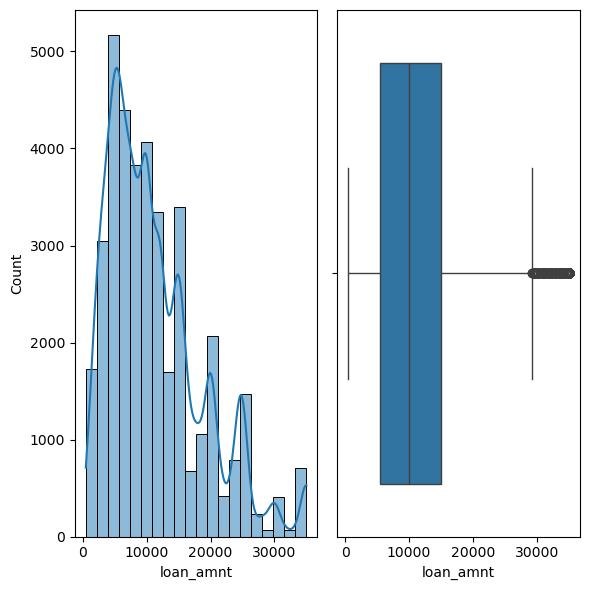

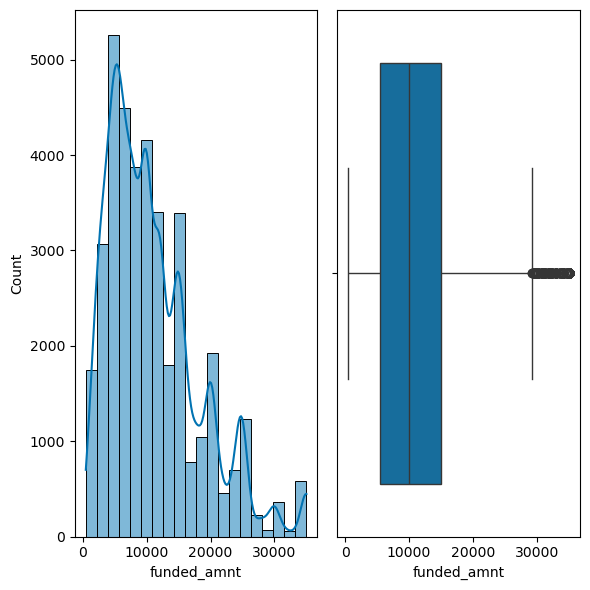

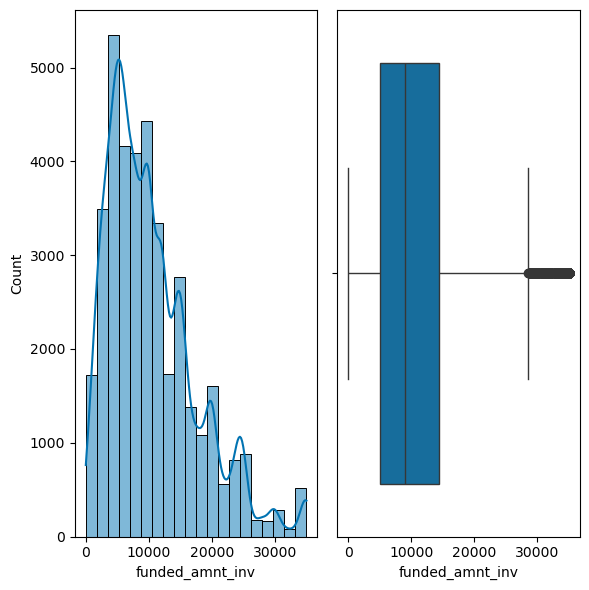

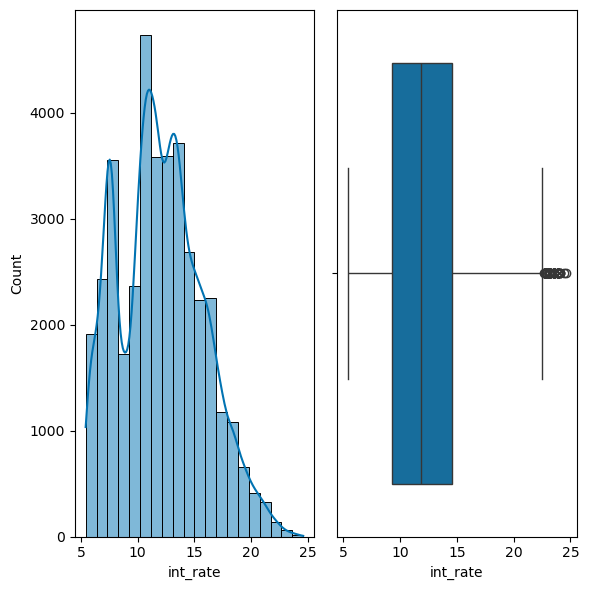

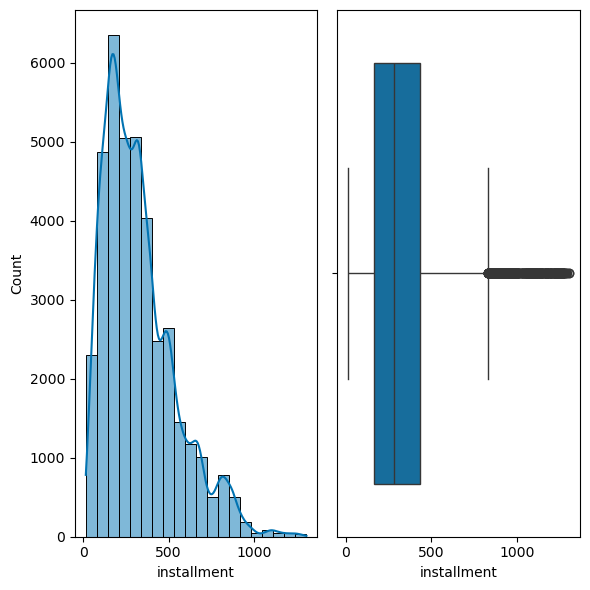

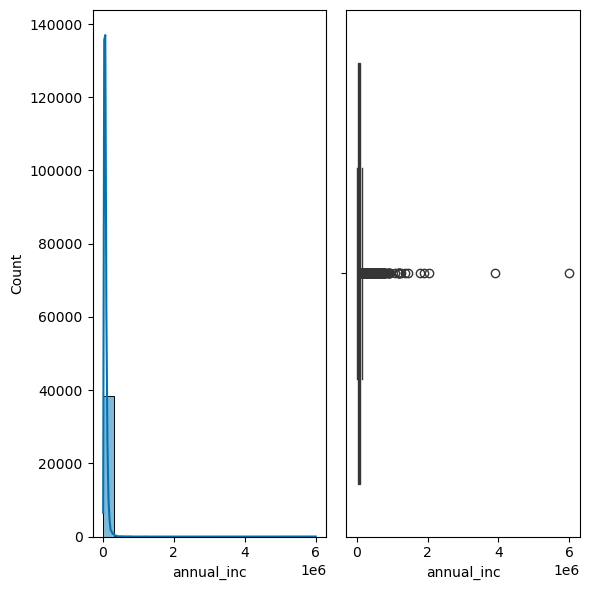

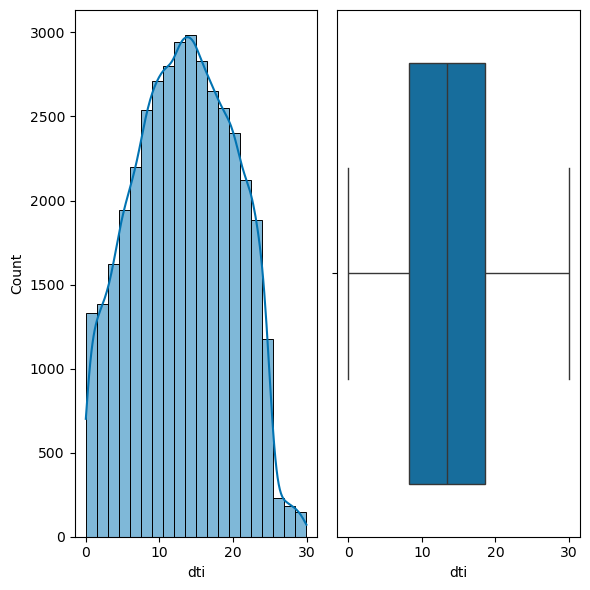

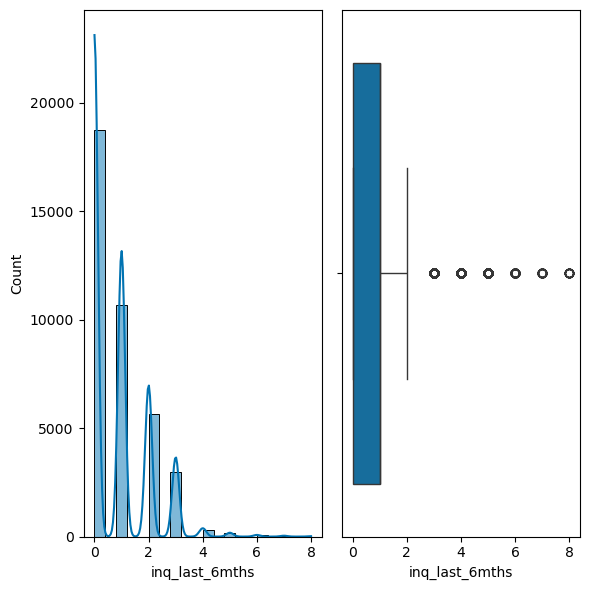

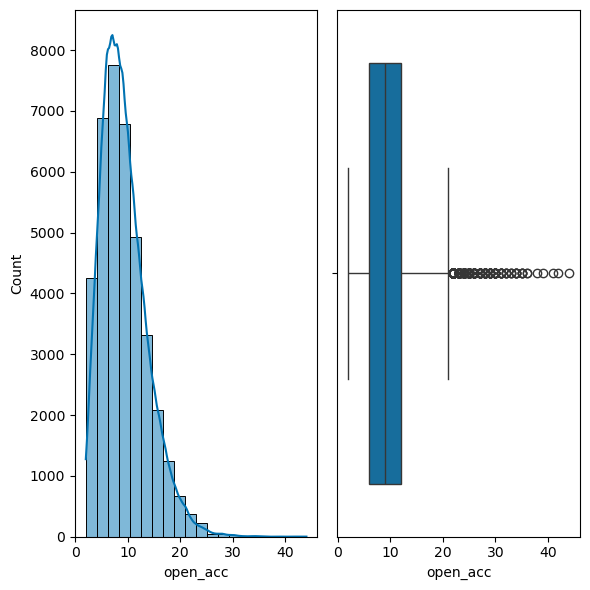

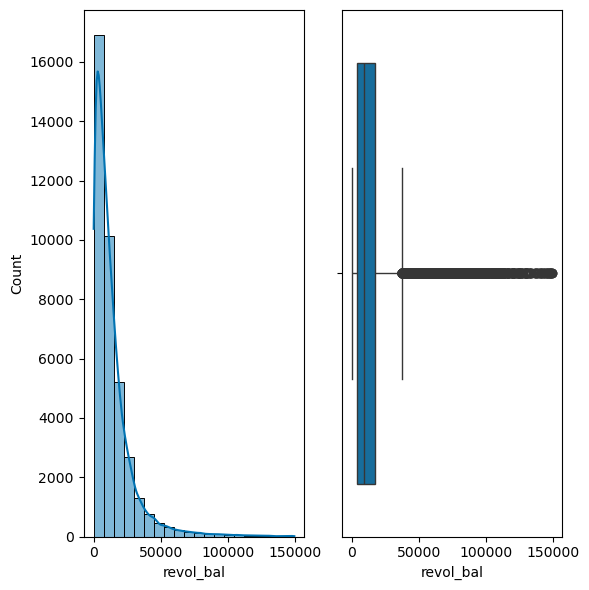

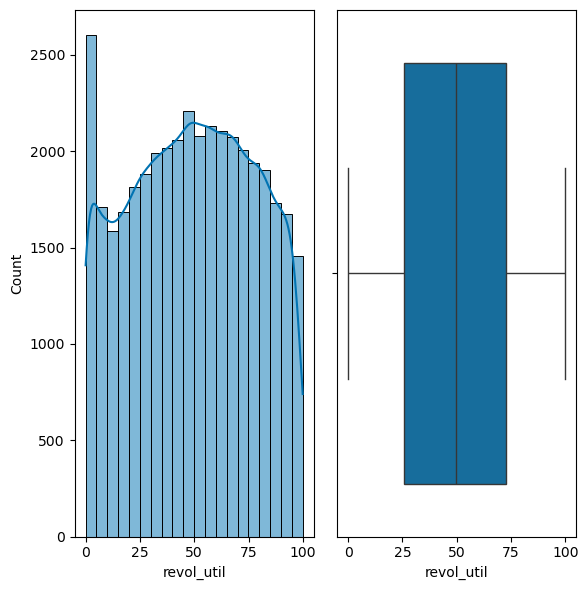

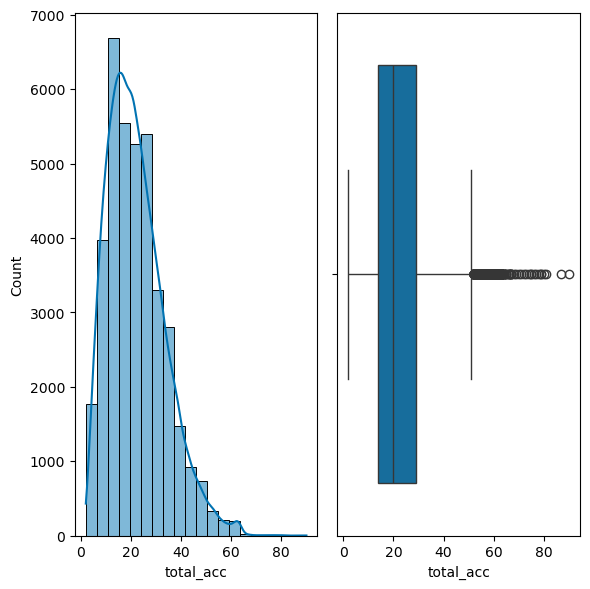

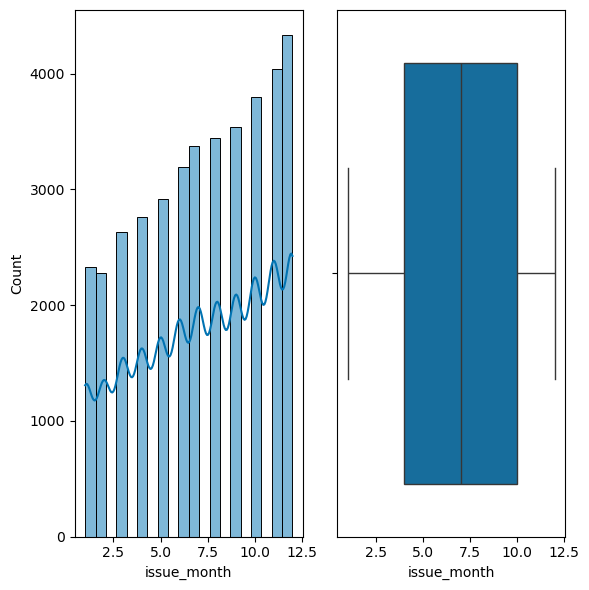

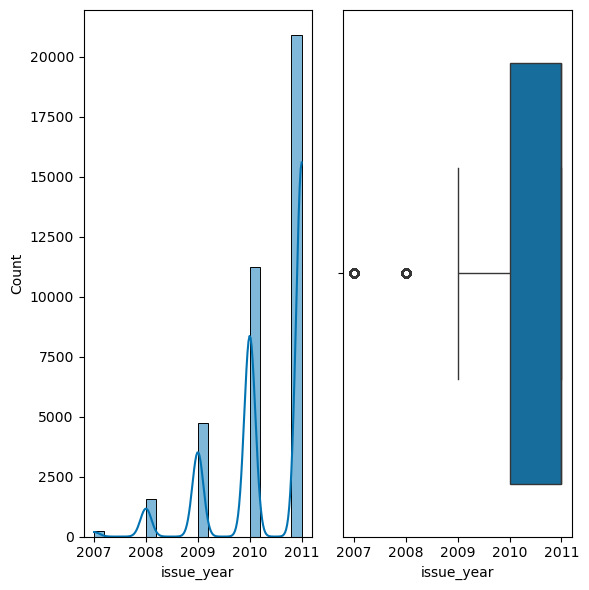

In [58]:
for col in numeric_data:
    fig, p = plt.subplots(1,2, figsize=(6, 6))
    sns.set_palette('colorblind')
    sns.histplot(x=numeric_data[col],ax=p[0],kde =True, bins = 20)
    sns.boxplot(x=numeric_data[col],ax=p[1])
    plt.tight_layout()
    plt.show()

<h3 style="color: orange;">Insights from Univariate Analysis Summary for Numeric Column</h3>

- **Loan and Funded Amounts:** The loan amount, funded amount, and funded amount invested are closely aligned, with 50% of these values clustered around 10,000 Outliers above 30,000 indicate that borrowers' requested amounts and the amounts funded follow similar patterns.    
- **Installment Amounts:**  Most borrowers have installment amounts ranging between 200 and 400.
- **Annual Income:** The annual income data contains numerous outliers. After excluding these outliers, we observe that 50% of the annual incomes fall below 56,000, with the majority of incomes ranging between 40,000 and 75,000.
- **Loan Duration:** Both the number of months and years show a gradual increase in distribution, suggesting a trend toward longer loan terms.
- **Interest Rates:** The majority of borrowers are charged interest rates in the range of 10% to 15%.
- **Debt-to-Income (DTI) Ratios:** Most borrowers have DTI ratios between 10% and 20%.

<h3 style = \"color : Indigo\"> <span style="color: Green;">Univariate Analysis in Categorical columns</span> </h3>

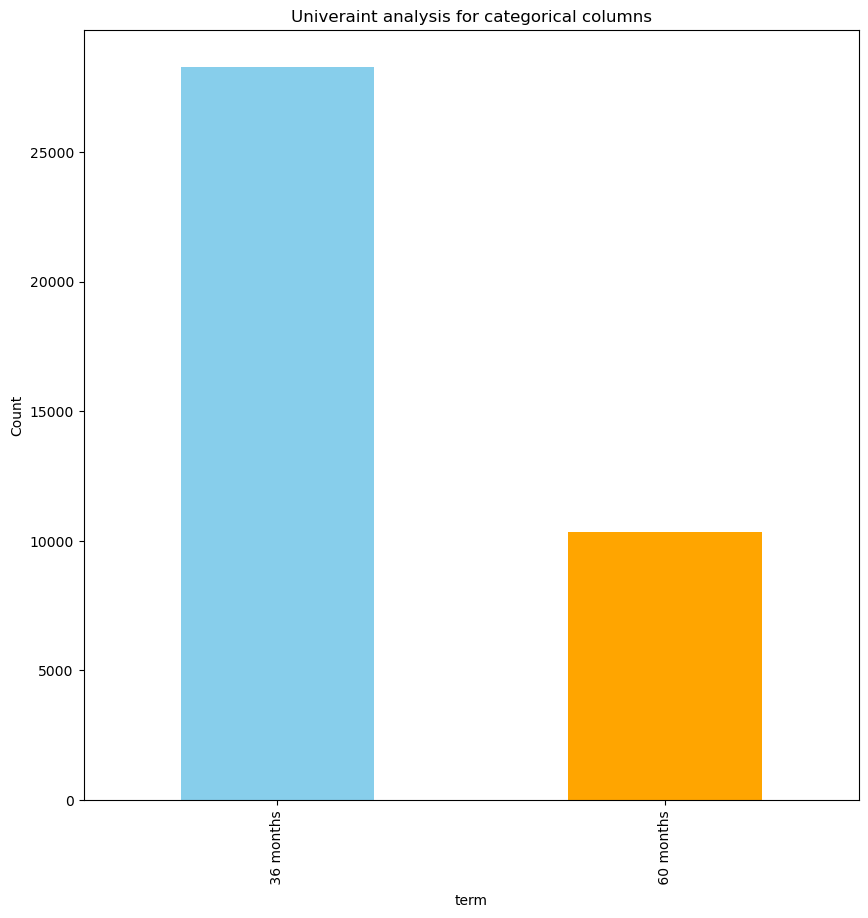

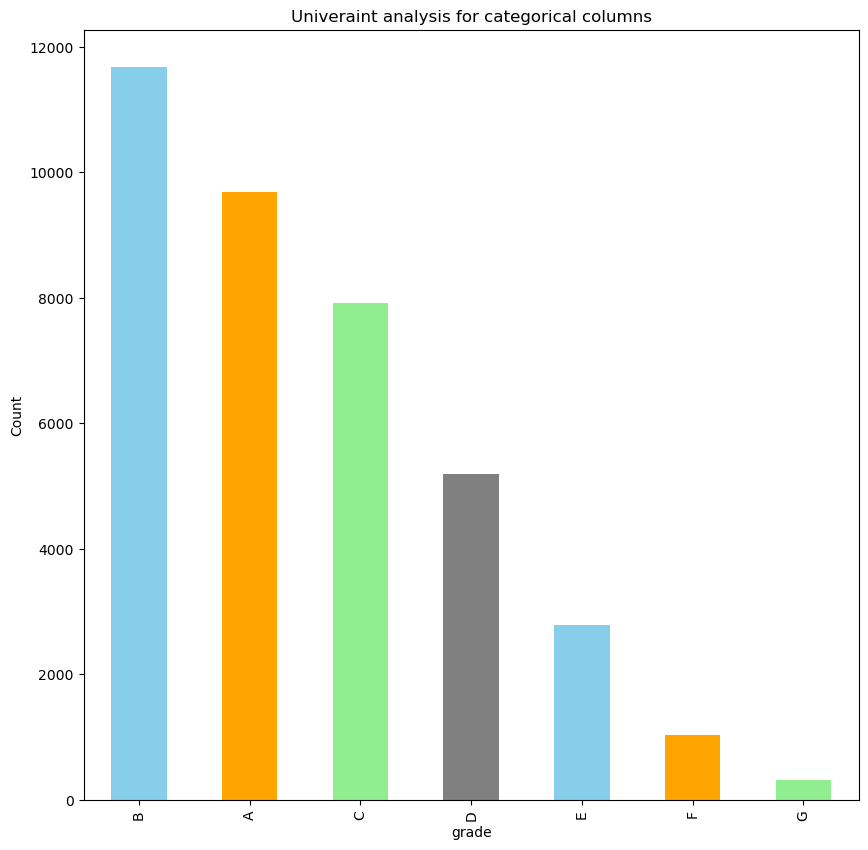

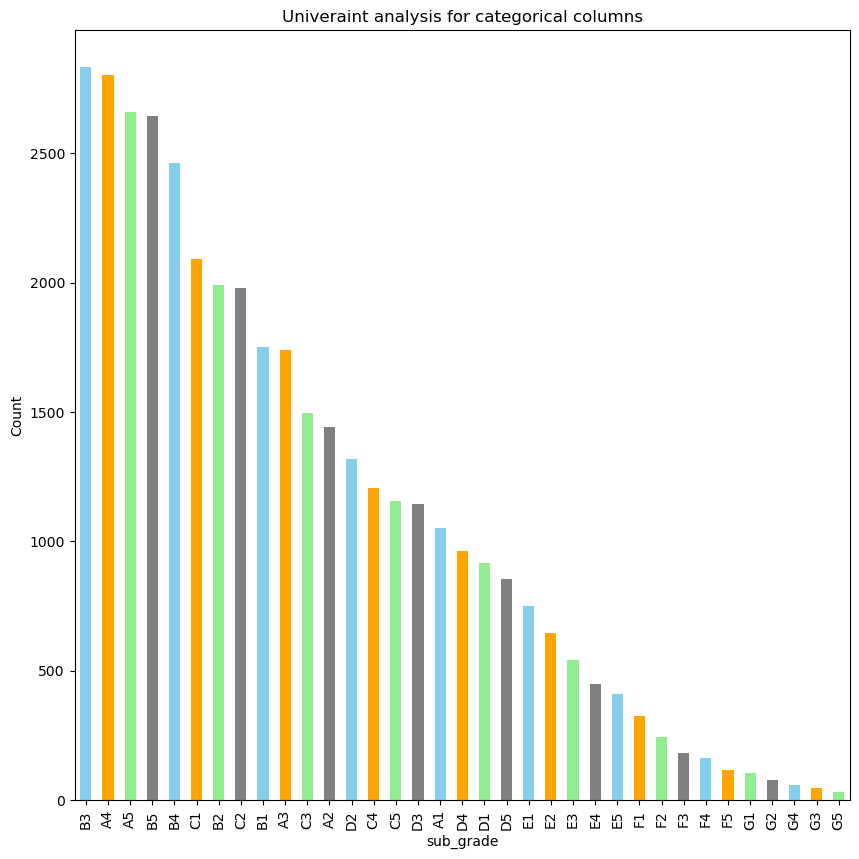

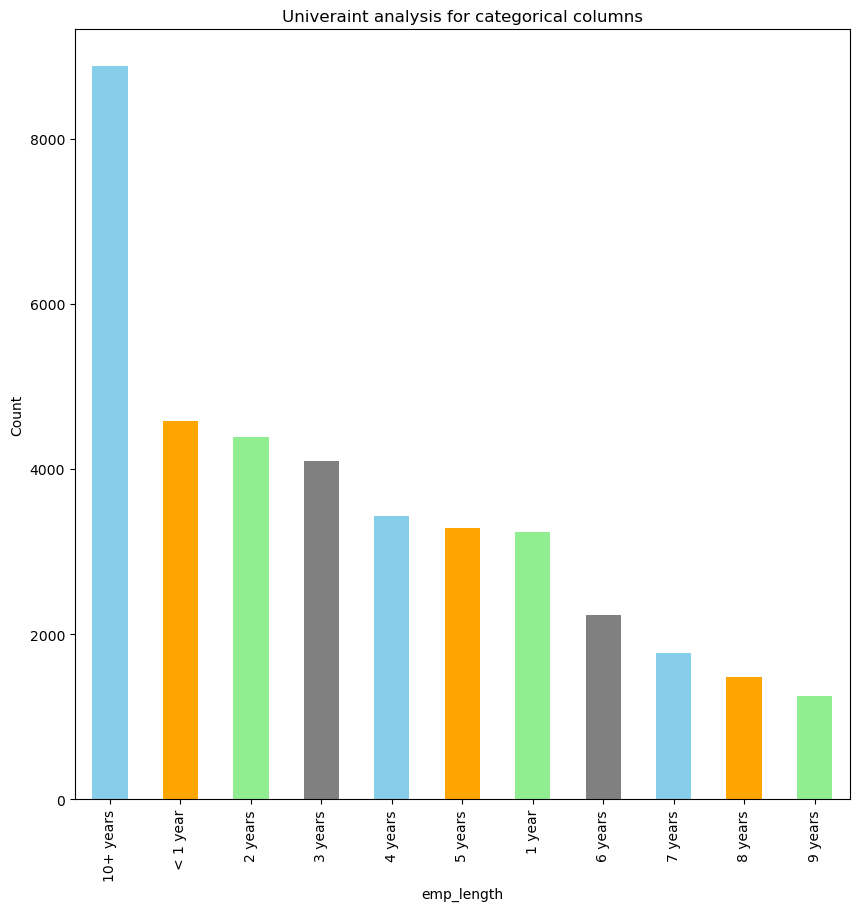

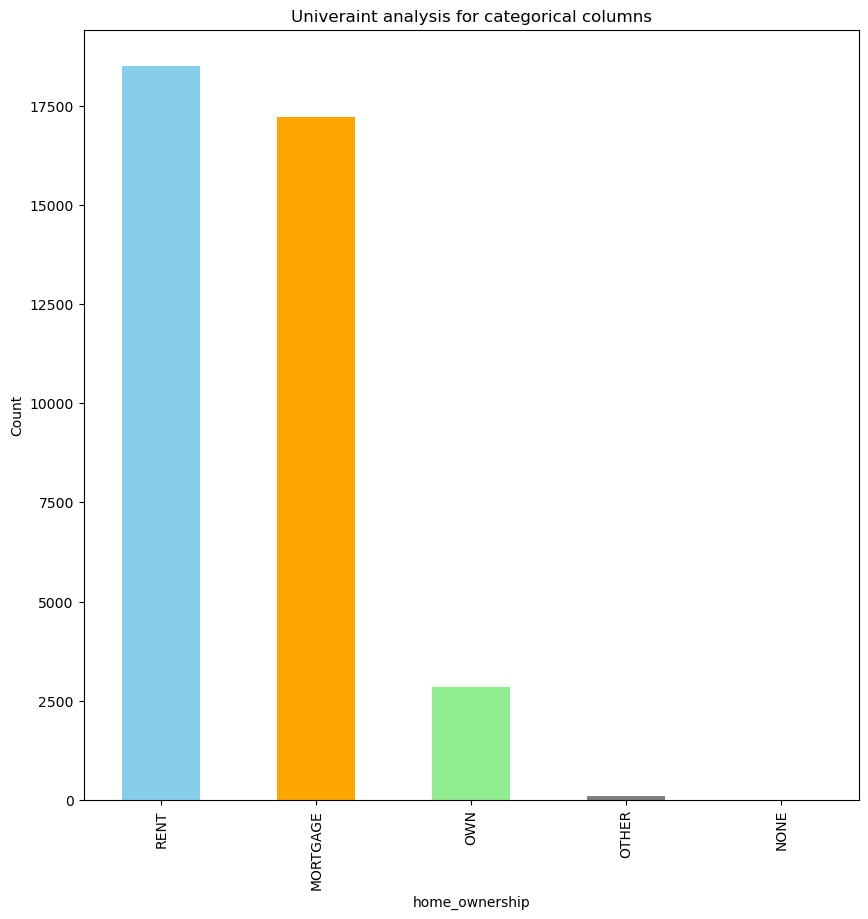

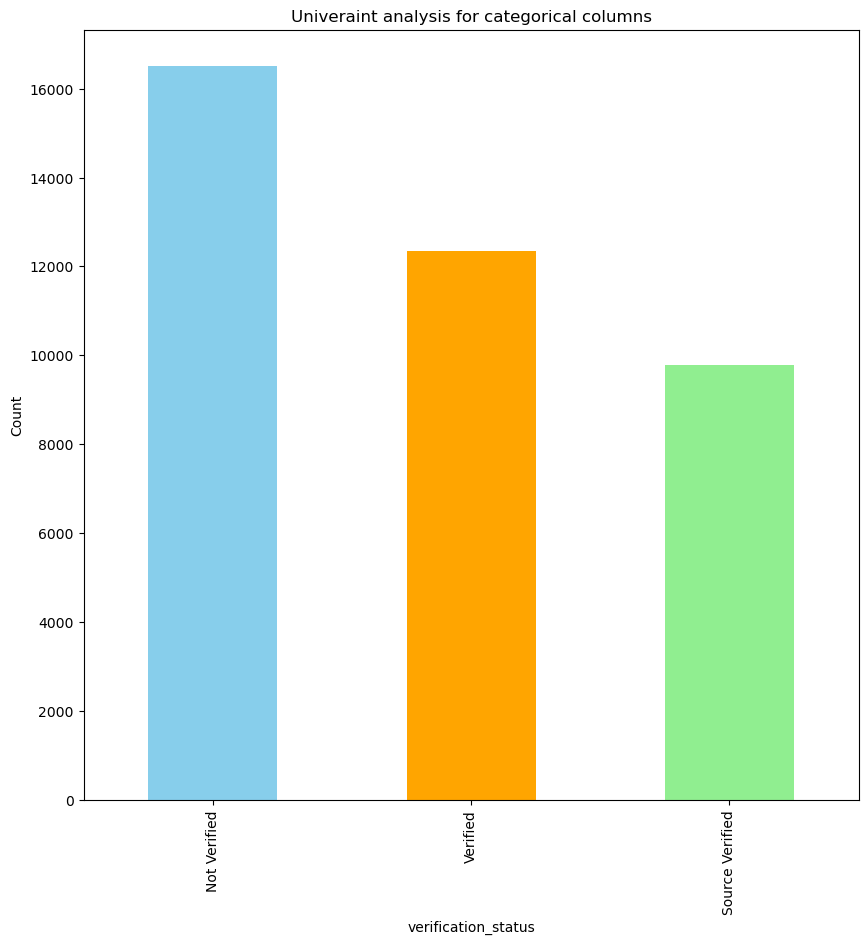

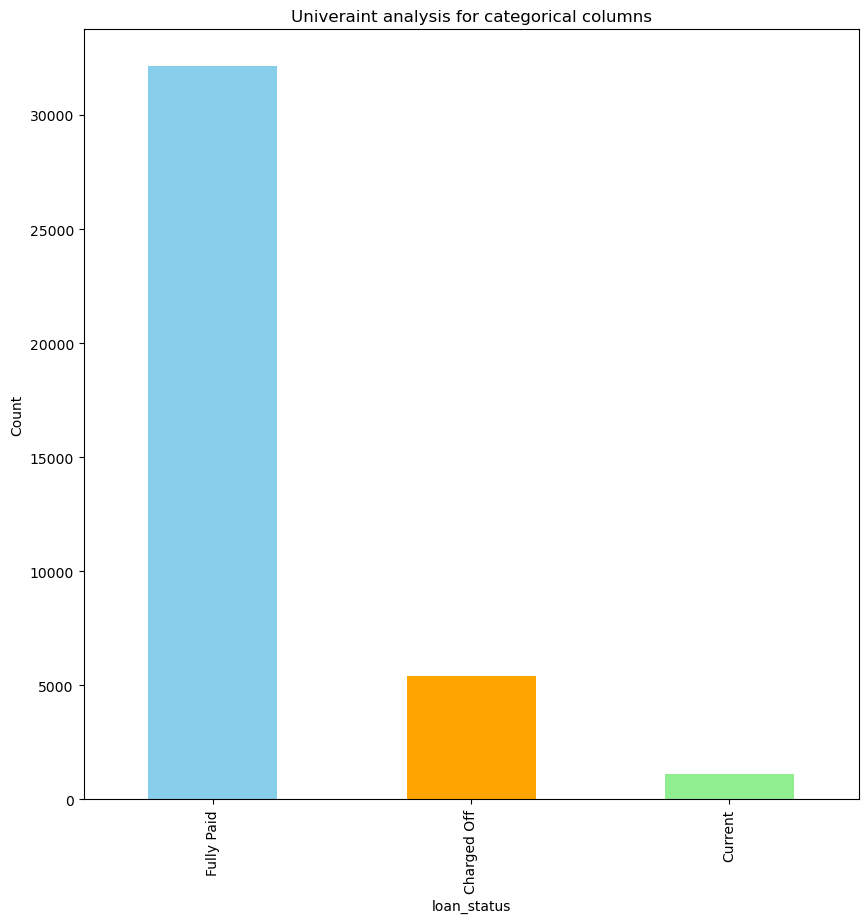

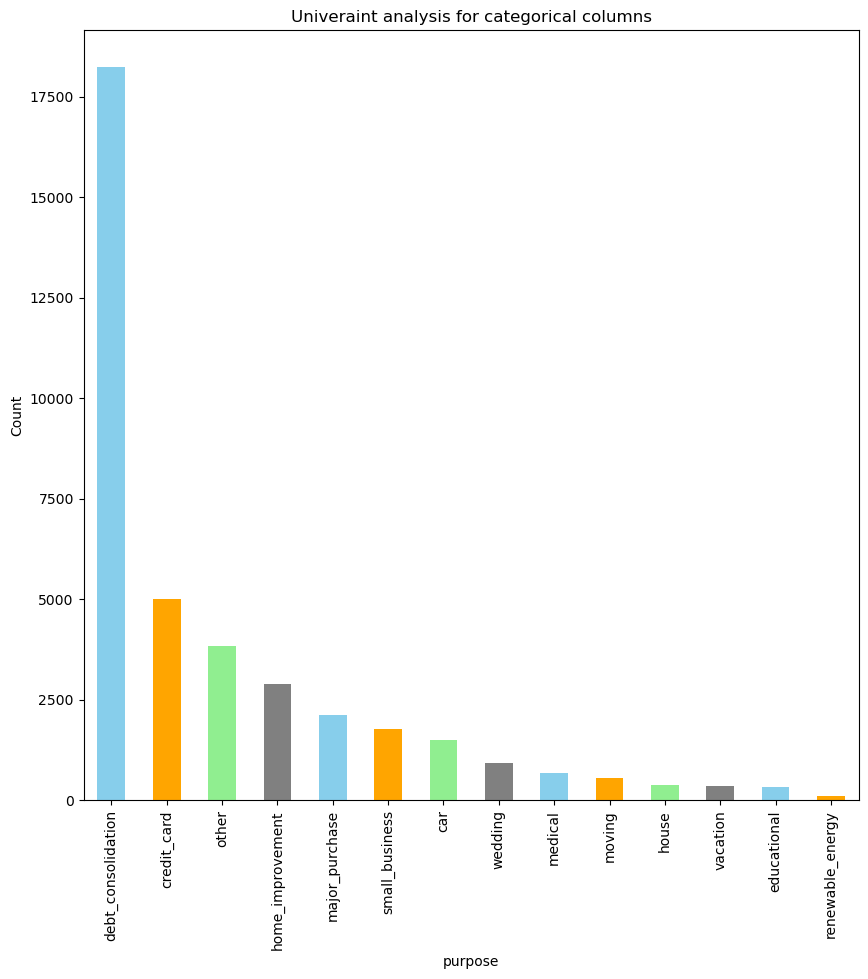

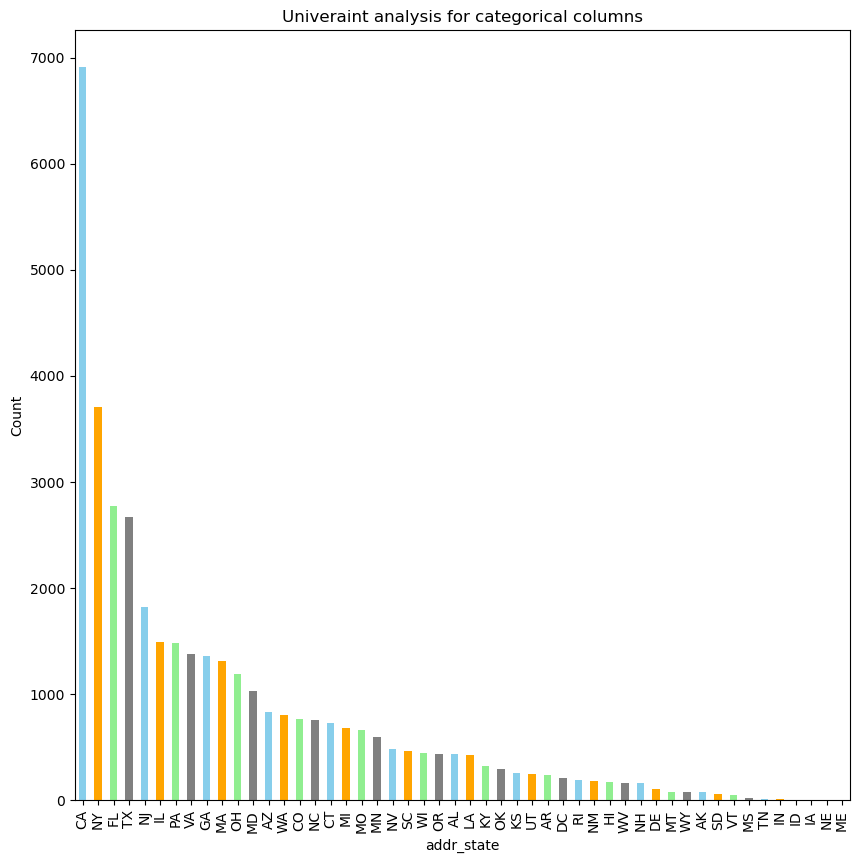

In [61]:
colors = ['skyblue', 'orange', 'lightgreen','grey'] 
for col in categorical_data:
    counts = categorical_data[col].value_counts()
    plt.figure(figsize=(10, 10))
    counts.plot(kind='bar', color=colors)
    # Customize plot
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Univeraint analysis for categorical columns')
    plt.xticks(rotation=90)
    plt.show()

<h3 style="color: orange;">Insights from doing Univariate Analysis of Categorical Columns</h3>

- Most loans fall under the A, B, and C grade categories.
- The majority of borrowers have opted for a 36-month term.
- The subgrades A5, A4, and B3 have the highest number of borrowers.
- Borrowers tend to be either highly experienced, with over 10 years of employment, or relatively inexperienced, with less than 1 year of experience.
- Most borrowers have home ownership status as 'RENT' or 'MORTGAGE', with very few owning their homes.
- For the majority of applicants, income source verification is not provided.
- Debt consolidation is the most common purpose for loans among borrowers.
- California (CA) has the highest number of borrowers.
- The year 2011 recorded the maximum number of borrowers, with a noticeable increasing trend year by year.
- Borrowers are distributed across various salary ranges, with the highest concentration in the $80,000 and above range.

<h3 style = \"color : Indigo\"> <span style="color: Green;"> Handling Outliers </span> </h3>

In [64]:
df.annual_inc.describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [65]:
df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     60000.0
0.75     83000.0
0.90    116672.4
0.95    142000.0
0.97    166213.0
0.98    189996.0
0.99    235000.0
Name: annual_inc, dtype: float64

In [66]:
df = df[df['annual_inc'] <= df.annual_inc.quantile(0.95)]

In [67]:
df.loan_amnt.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     9500.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.97    25795.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

In [68]:
df.funded_amnt.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     9050.0
0.75    14400.0
0.90    20000.0
0.95    25000.0
0.97    25000.0
0.98    28613.0
0.99    34308.5
Name: funded_amnt, dtype: float64

In [69]:
df.total_acc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50    20.0
0.75    28.0
0.90    37.0
0.95    43.0
0.97    47.0
0.98    50.0
0.99    55.0
Name: total_acc, dtype: float64

In [70]:
df.revol_bal.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     8590.00
0.75    16231.50
0.90    27065.80
0.95    36983.80
0.97    46011.58
0.98    54274.96
0.99    69906.04
Name: revol_bal, dtype: float64

In [71]:
df.open_acc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     8.0
0.75    12.0
0.90    15.0
0.95    17.0
0.97    19.0
0.98    20.0
0.99    22.0
Name: open_acc, dtype: float64

In [72]:
df.installment.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50    272.9500
0.75    411.4100
0.90    591.5040
0.95    709.8890
0.97    811.1434
0.98    849.0912
0.99    901.0100
Name: installment, dtype: float64

In [73]:
df.revol_bal.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     8590.00
0.75    16231.50
0.90    27065.80
0.95    36983.80
0.97    46011.58
0.98    54274.96
0.99    69906.04
Name: revol_bal, dtype: float64

In [74]:
df.int_rate.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50    11.71
0.75    14.35
0.90    16.77
0.95    18.25
0.97    19.29
0.98    19.91
0.99    20.89
Name: int_rate, dtype: float64

<h3 style = \"color : Indigo\"> <span style="color: Green;">Segmented Analysis in Numeric Columns</span> </h3>

In [76]:
colors = ['orange', 'cyan'] 

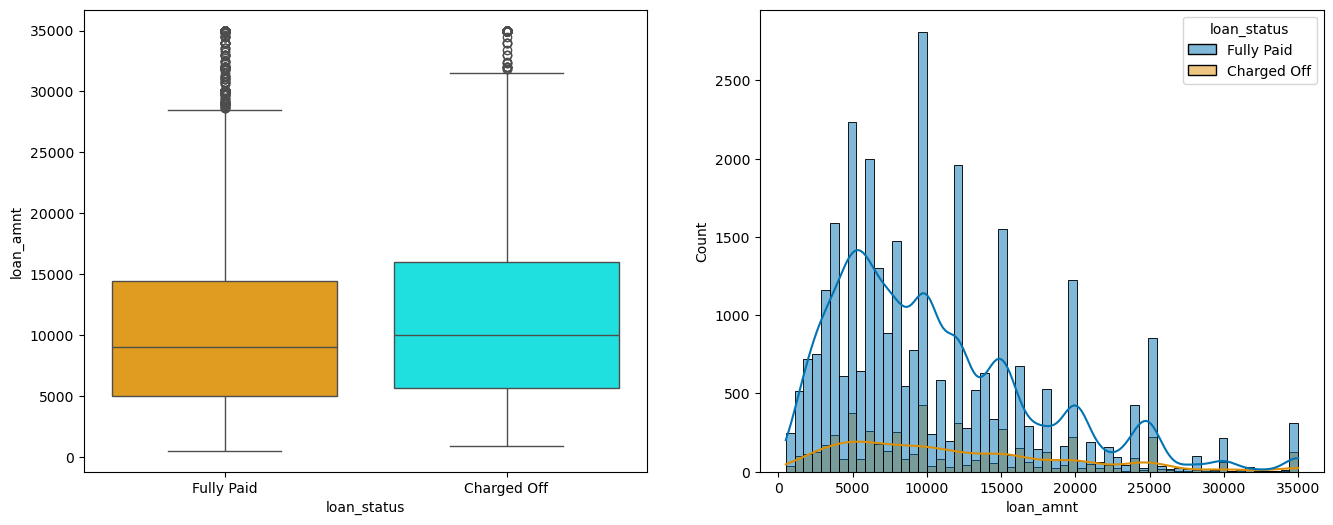

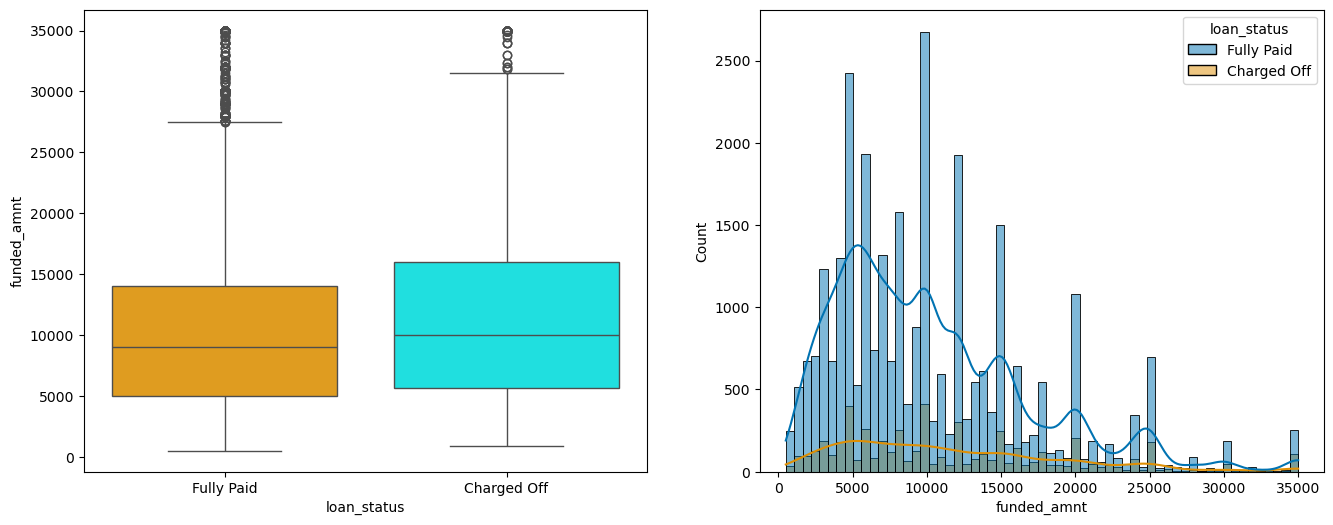

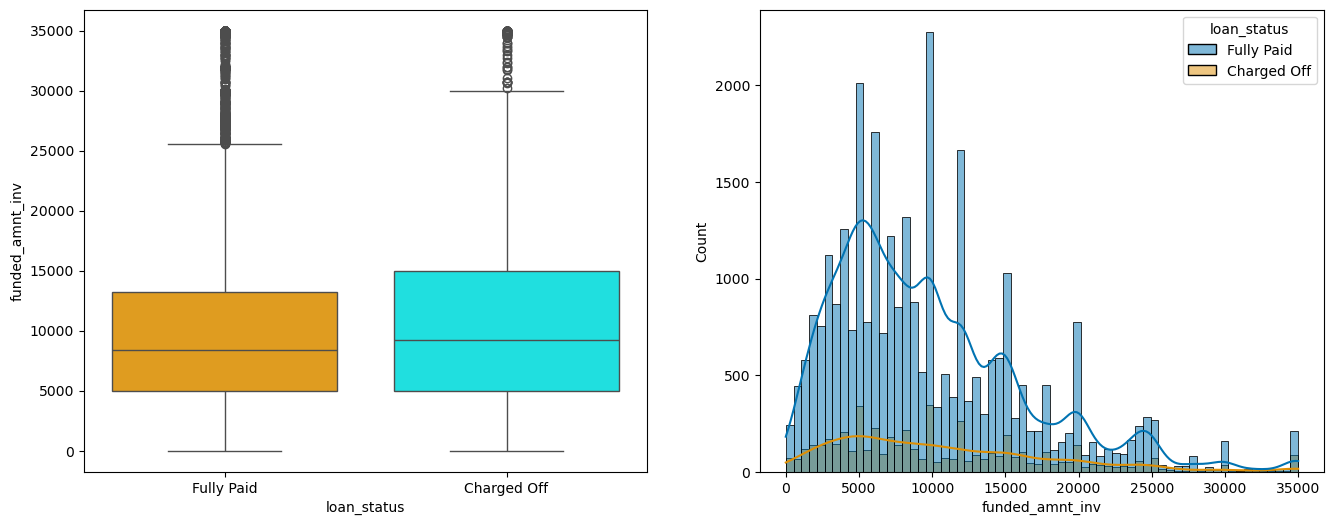

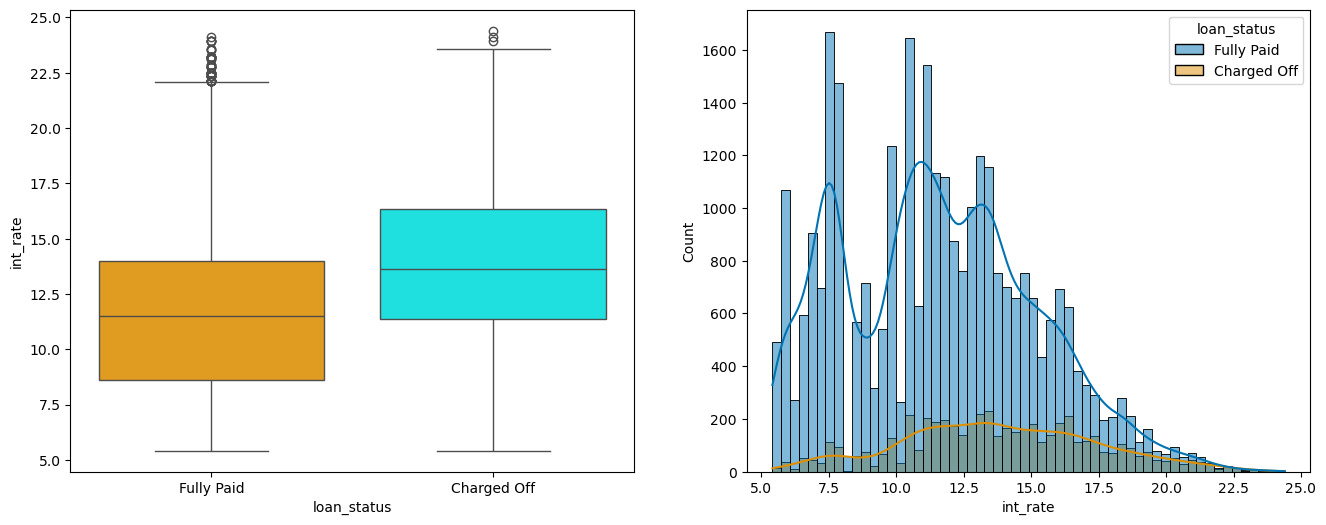

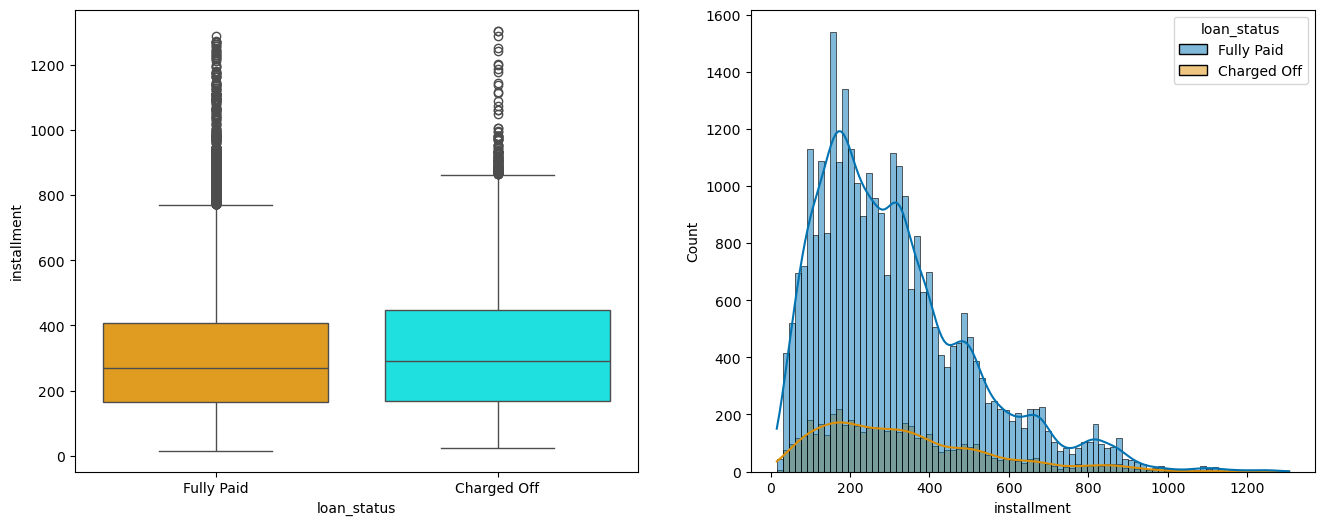

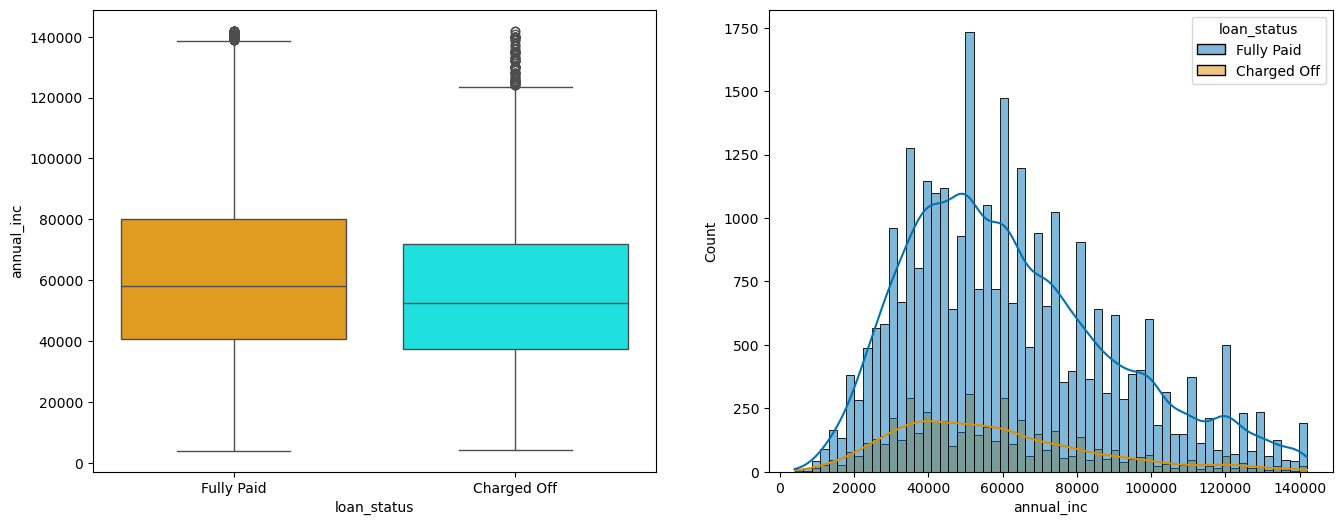

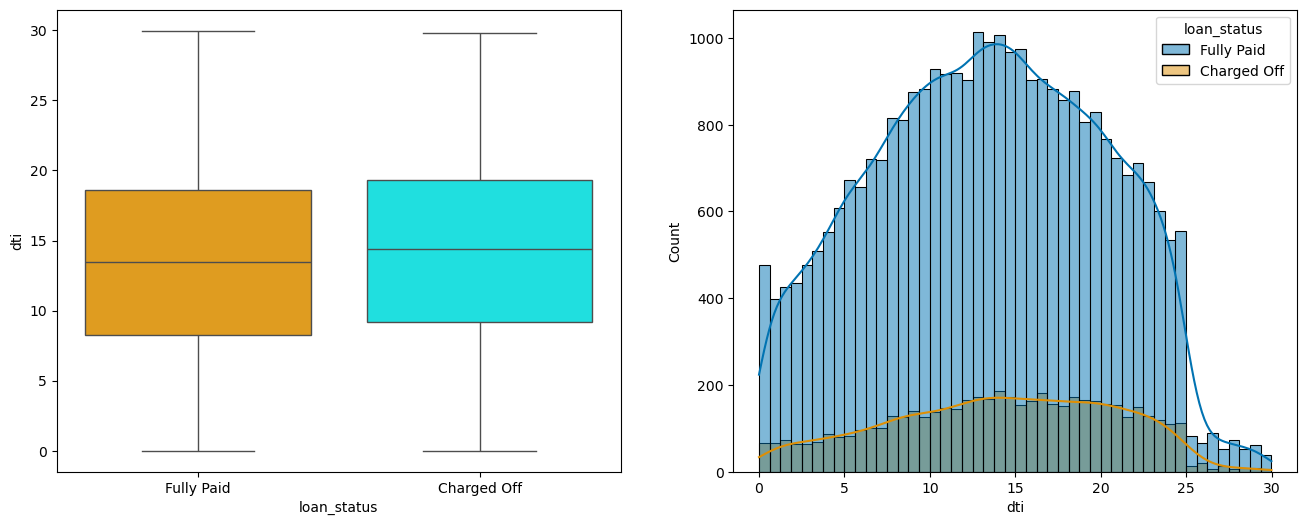

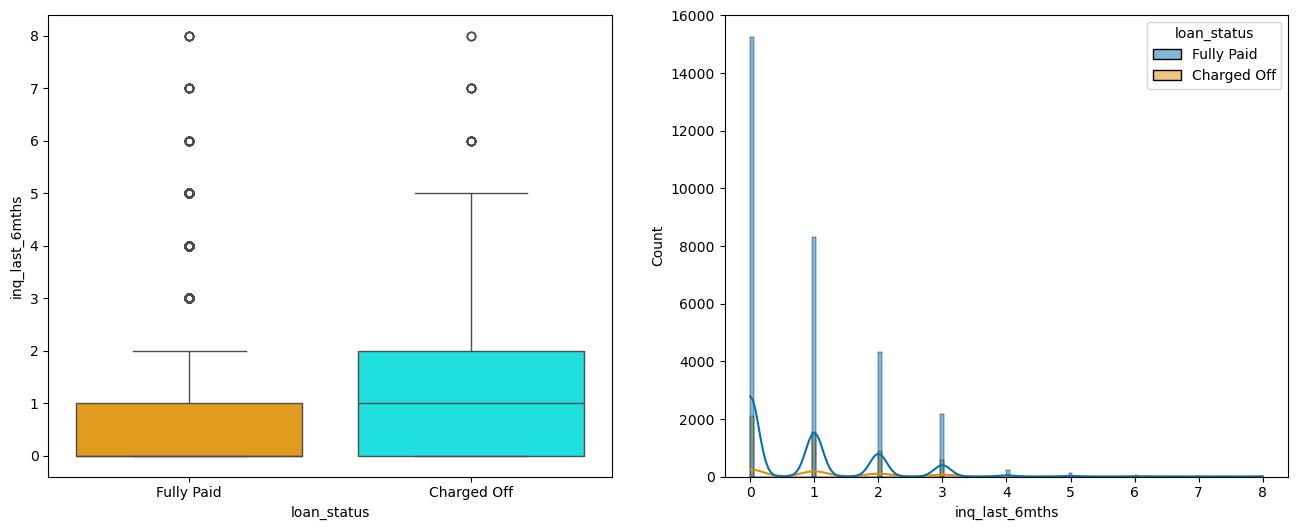

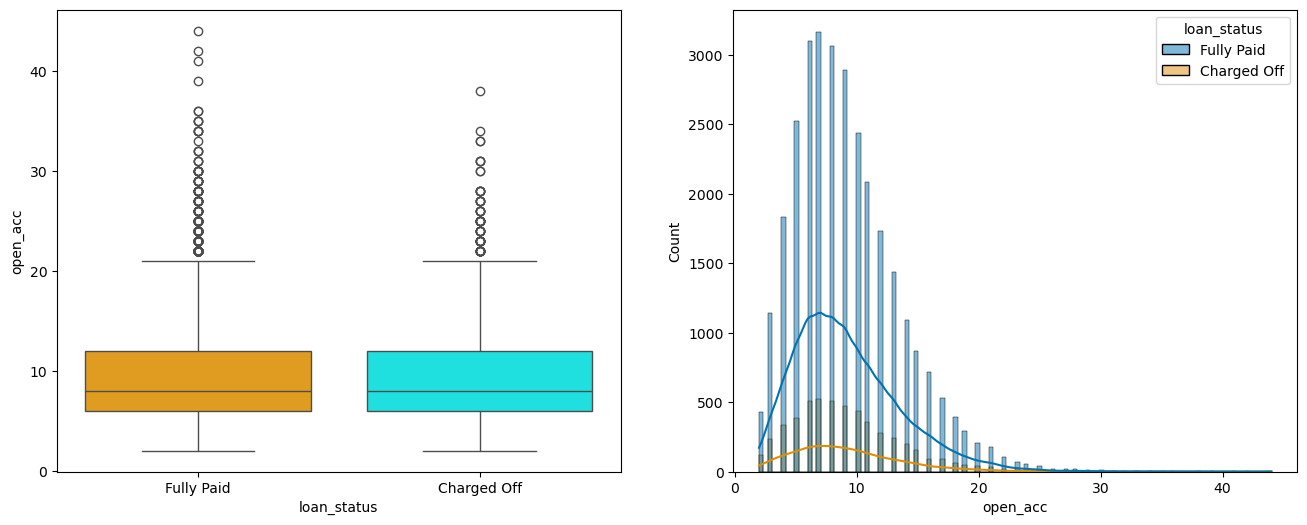

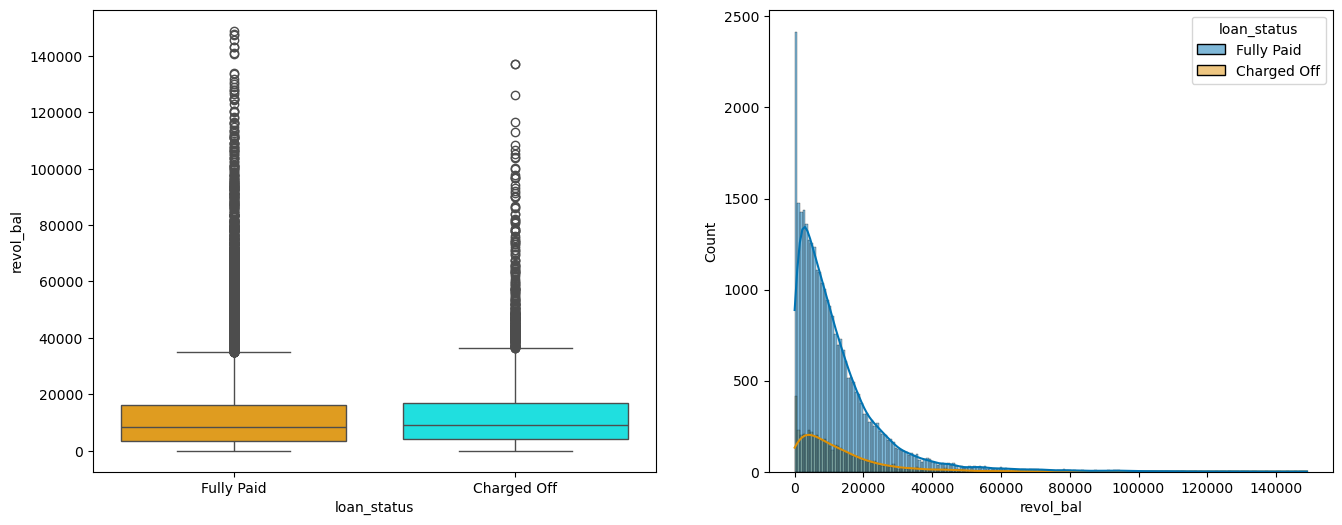

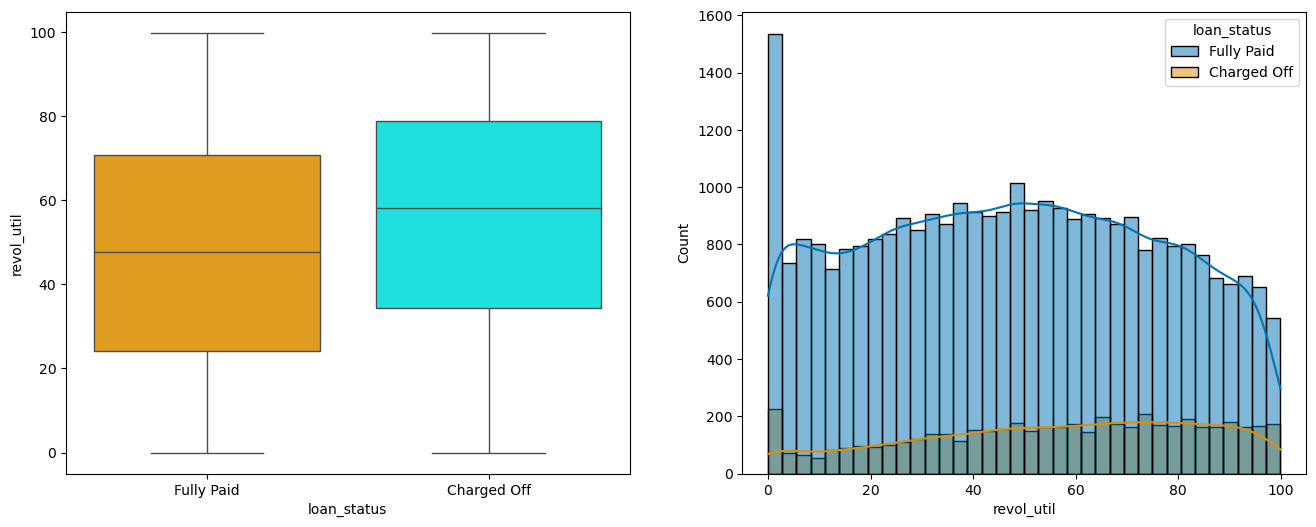

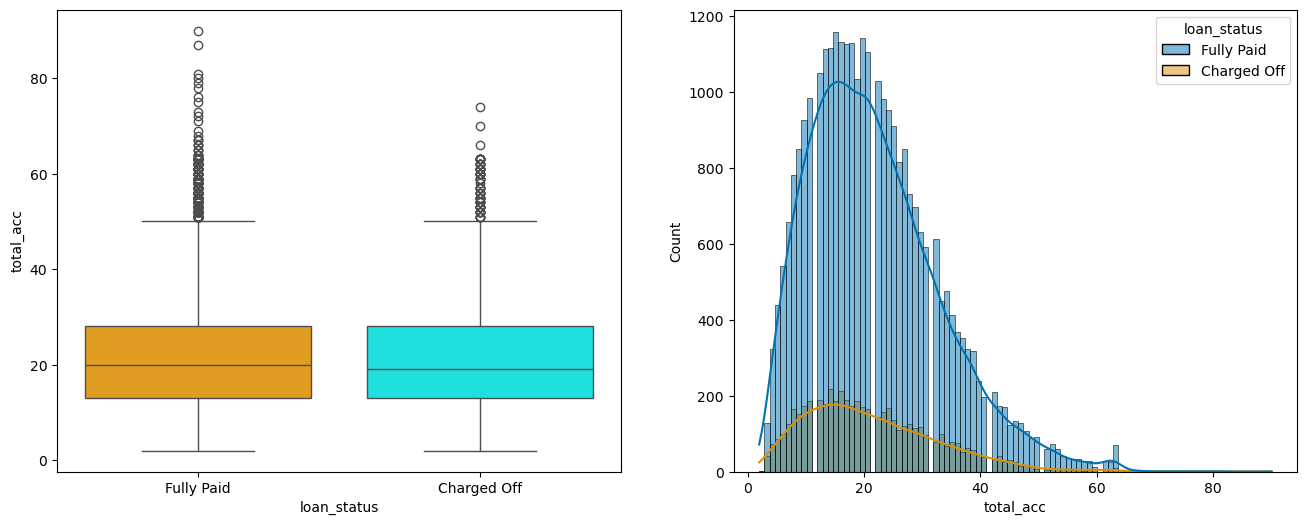

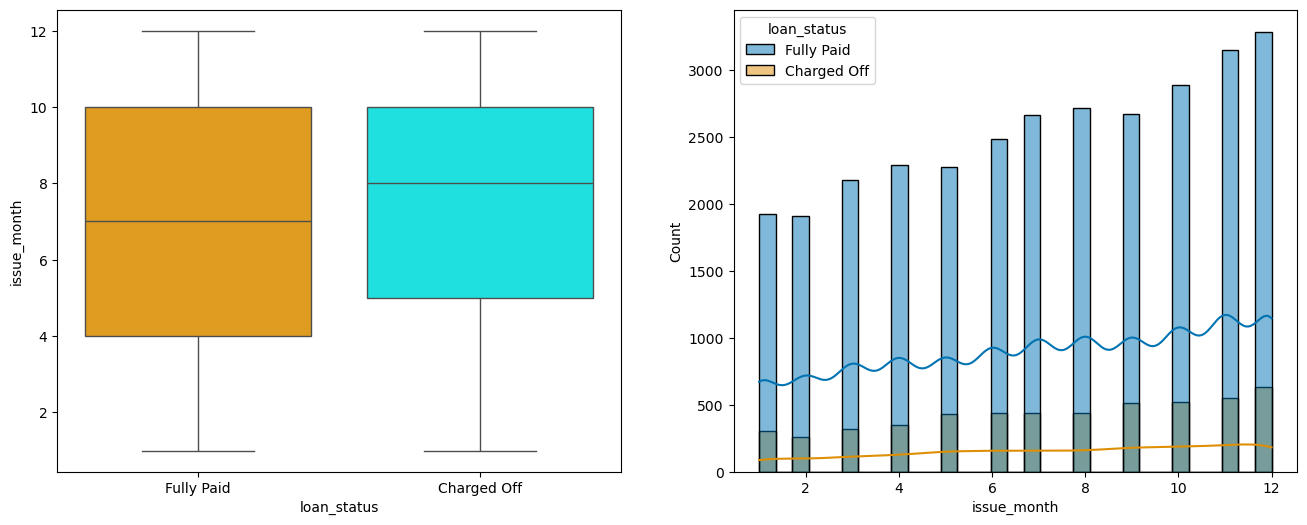

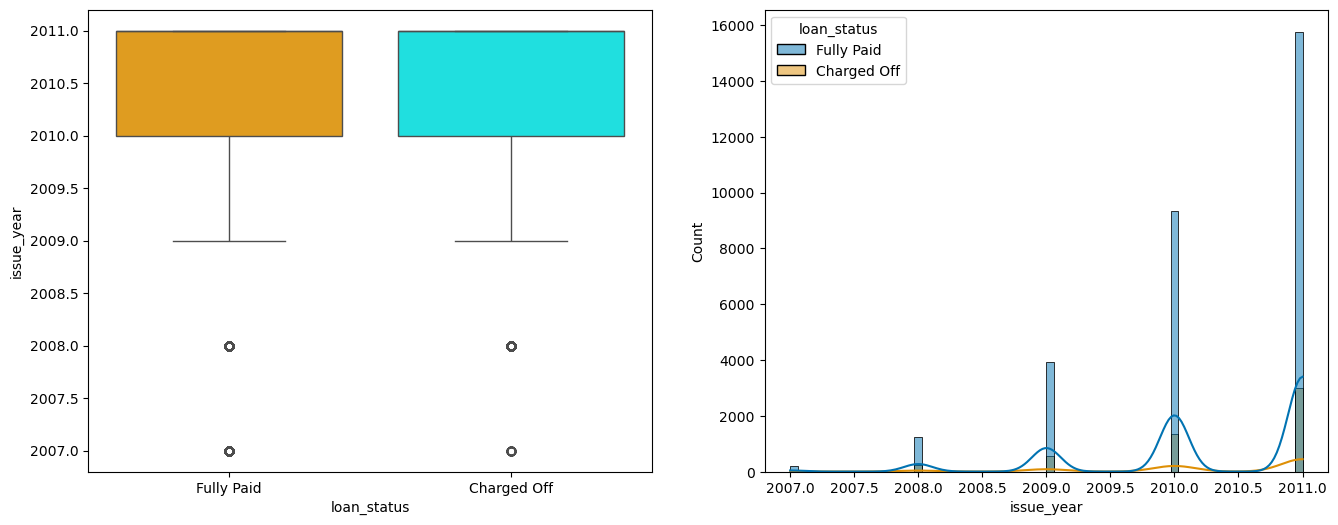

In [77]:
for col in numeric_data:
    fig, p = plt.subplots(1,2, figsize=(16, 6))
    sns.boxplot(data = df, x=df.loan_status, y =df[col], palette=colors, hue = df.loan_status, legend = False ,ax=p[0])
    sns.histplot(data=df, x=df[col], hue='loan_status', kde=True, ax=p[1])
    #plt.tight_layout()
    plt.show()

Doing further analysis on DTI

In [79]:
def dti_range_calculator(dti):
    if dti <= 10.00:
        return 'low'
    elif (dti >10.00 and dti <= 20.00):
        return 'medium'
    else:
        return 'high'
df['dti_range'] = df['dti'].apply(lambda x : dti_range_calculator(x) )

Text(0, 0.5, 'dti_range')

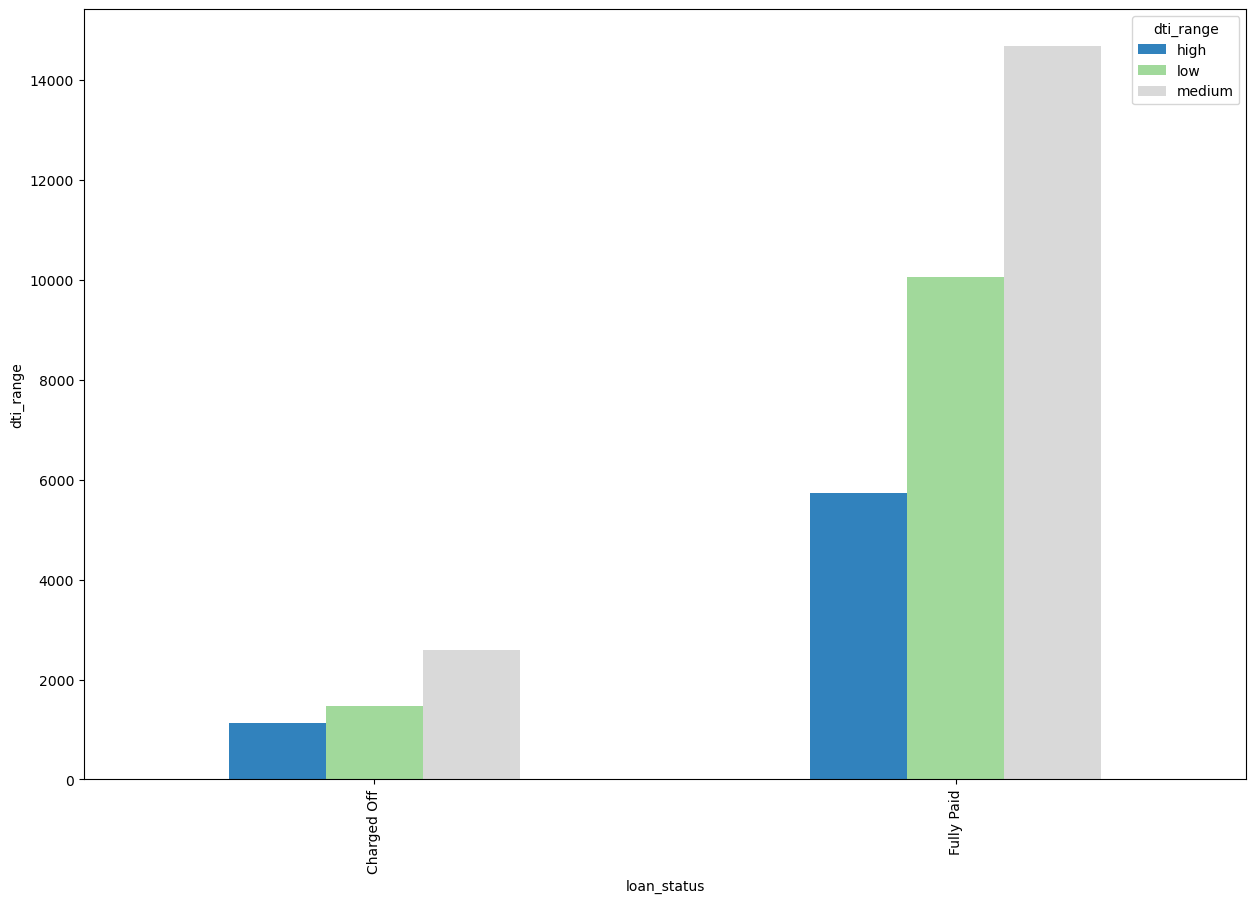

In [80]:
ct = pd.crosstab(df['loan_status'], df['dti_range'])
ct.plot(kind='bar', stacked=False, colormap='tab20c', figsize=(15, 10))
plt.ylabel('dti_range')

<h3 style="color: orange;">Obsevations : Segmented Analysis in Numeric Columns</h3>

- The dependency of the loan amount on loan status is not particularly significant, although borrowers who opted for higher loan amounts tend to be charged off more frequently.
- The funded amount's dependency on loan status is similarly minor, but borrowers with higher funded amounts show a higher default rate.
- The relationship between funded amount invested and loan status follows the same pattern, with higher funded amounts invested leading to more defaults.
- Borrowers with loans at higher interest rates are more likely to default.
- Borrowers with higher installment payments tend to default more often, though the difference is minimal.
- Higher annual income correlates with a fully paid loan status, but this difference is negligible.
- A higher Debt-to-Income (DTI) ratio is associated with a greater likelihood of default.
- **Experience:** Borrowers with either 10 years of experience or less than 1 year of experience have high counts in both the Fully Paid and Charged Off loan categories.
- **Yearly Trend:** The year 2011 has the most Charged Off and Fully Paid borrowers.
- No conclusion can be made on revol bal, total_acc, open_acc, 



<h3 style = \"color : Indigo\"> <span style="color: Green;">Bivariate Analysis in Categorical Columns</span> </h3>

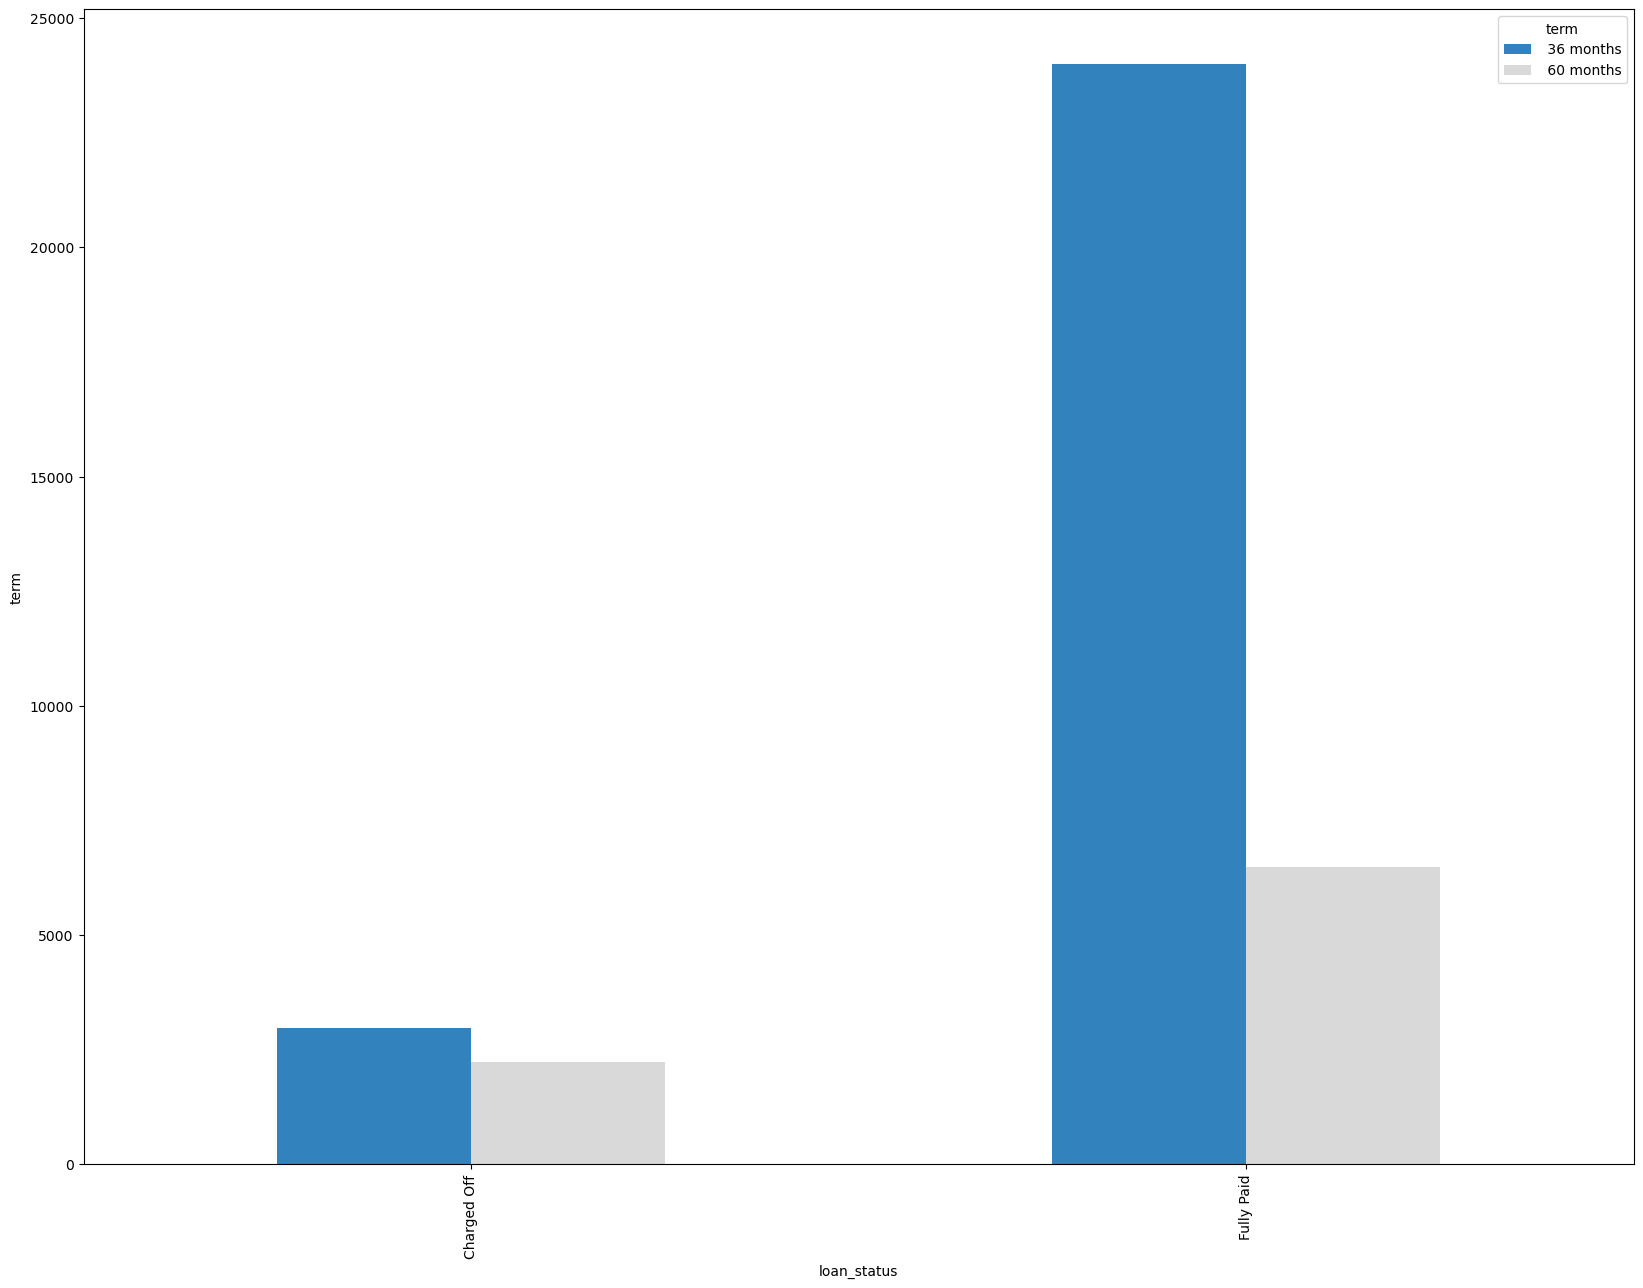

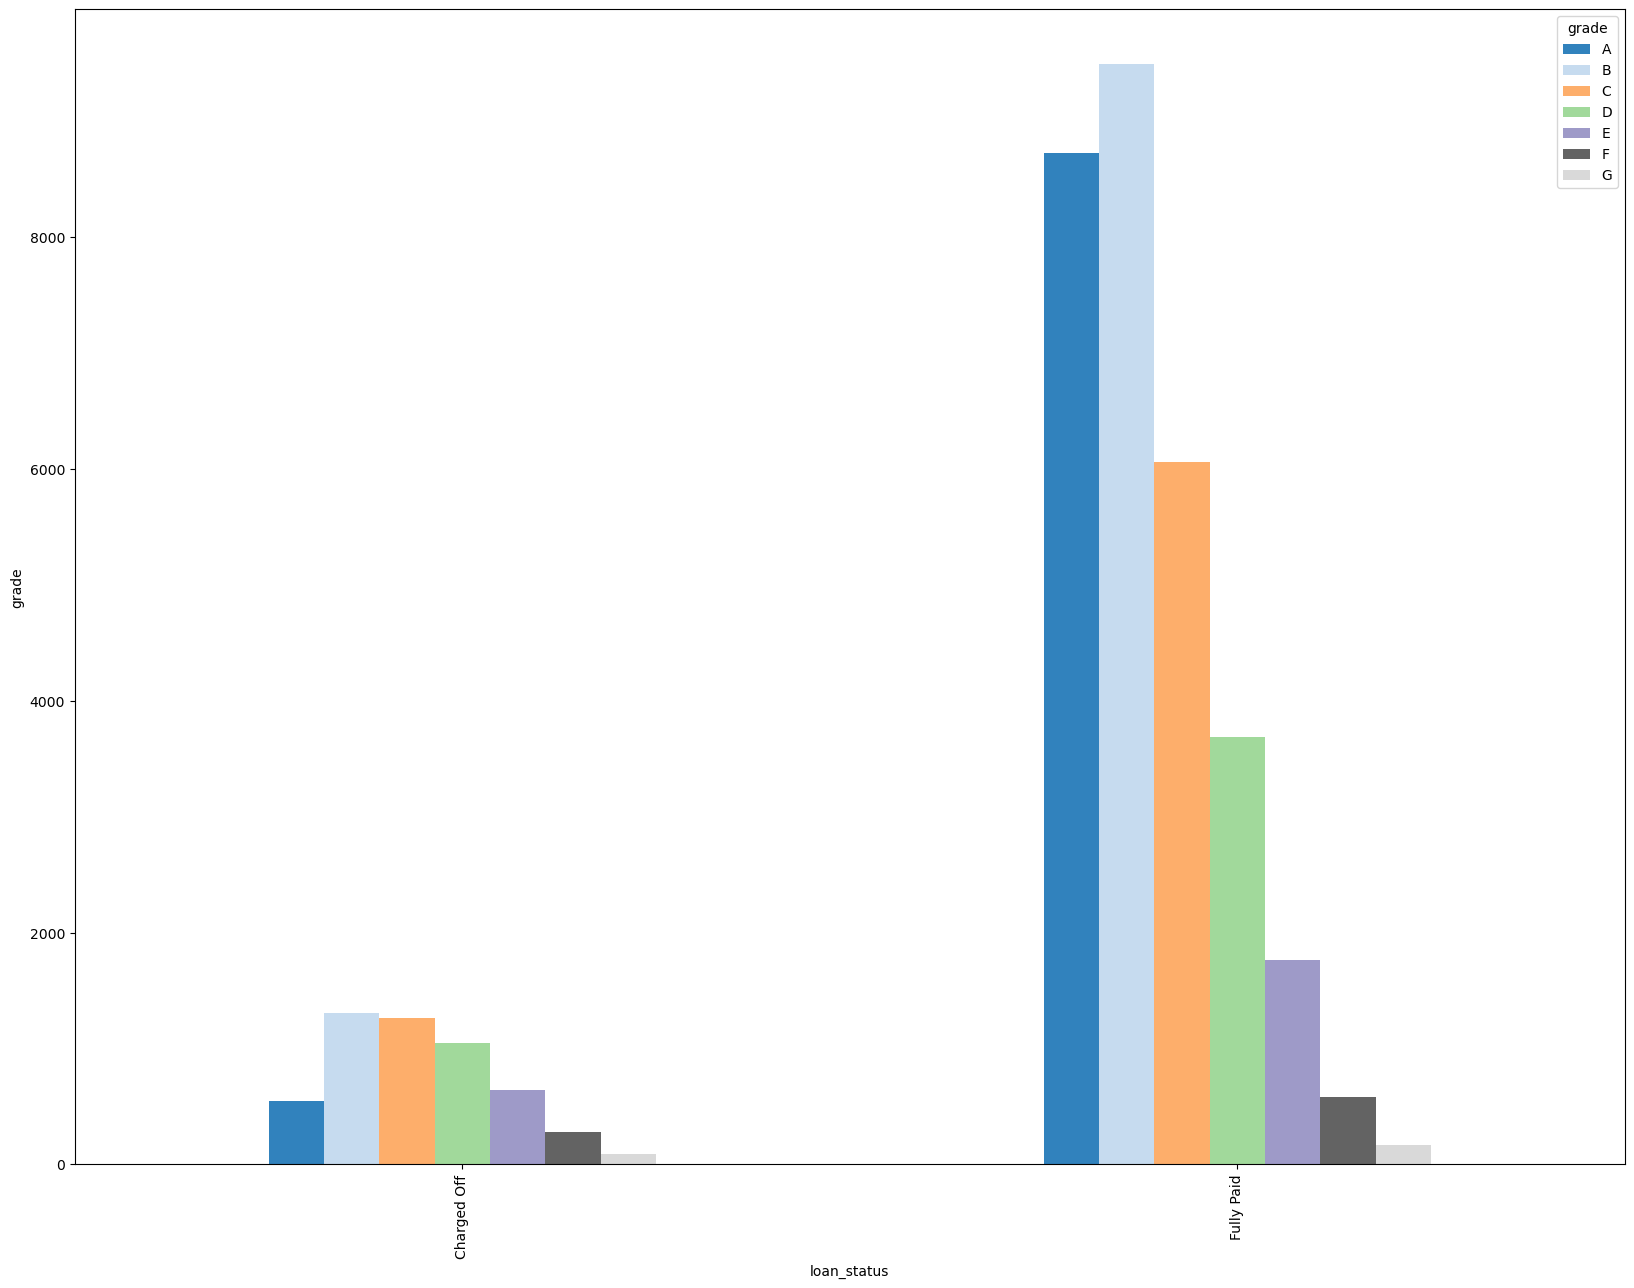

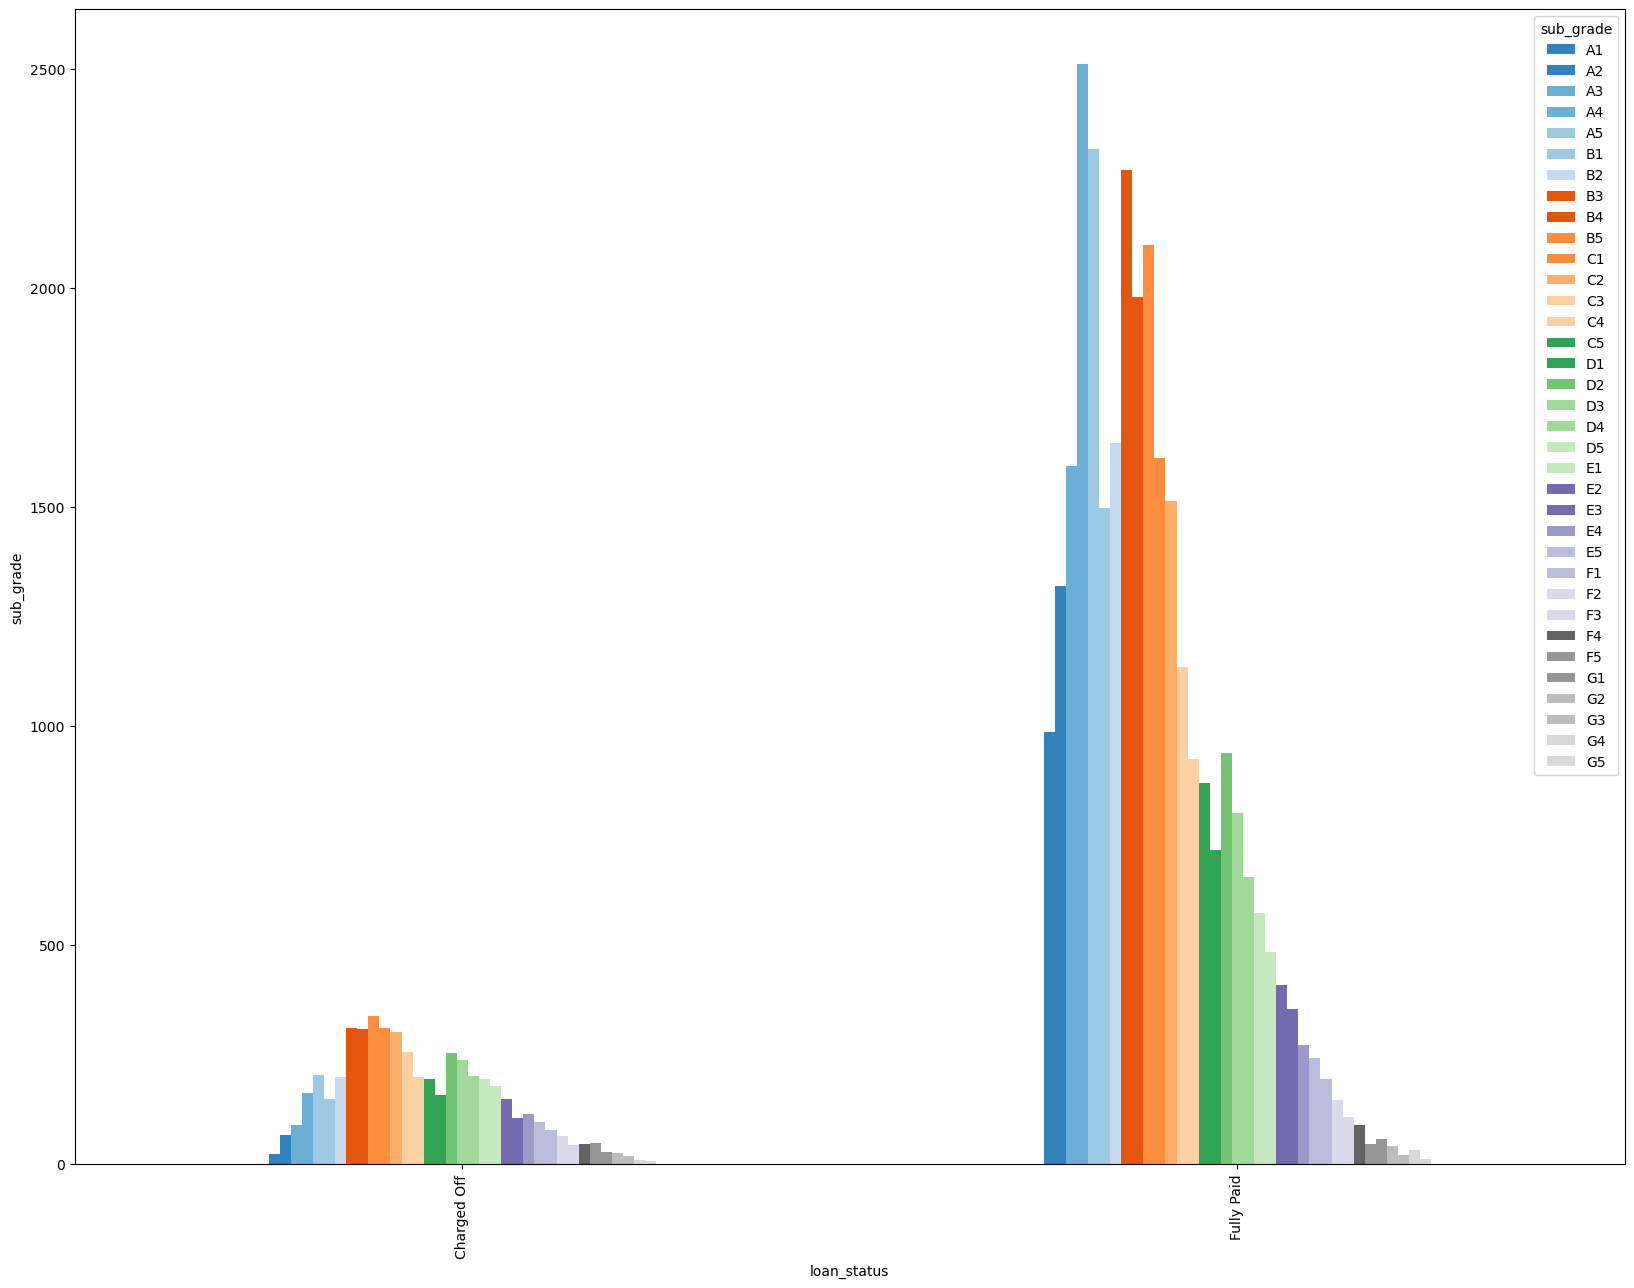

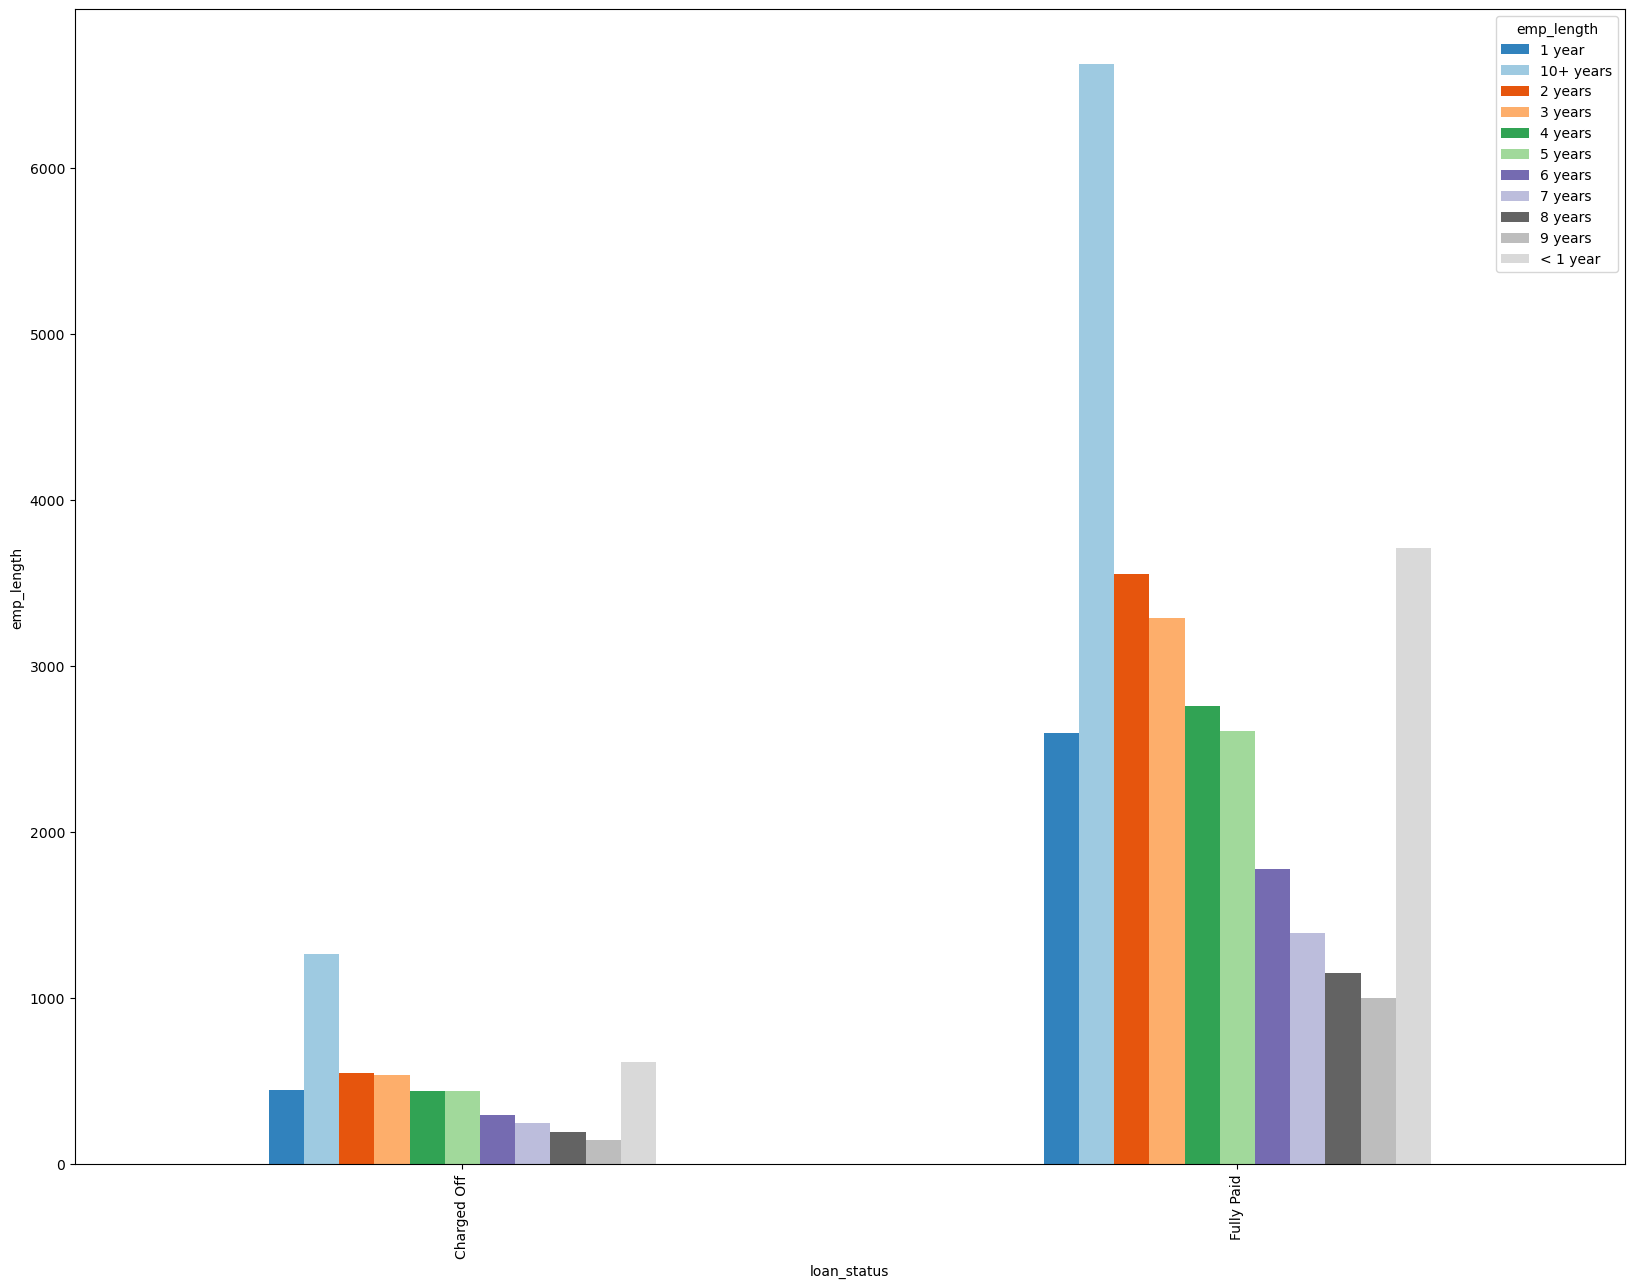

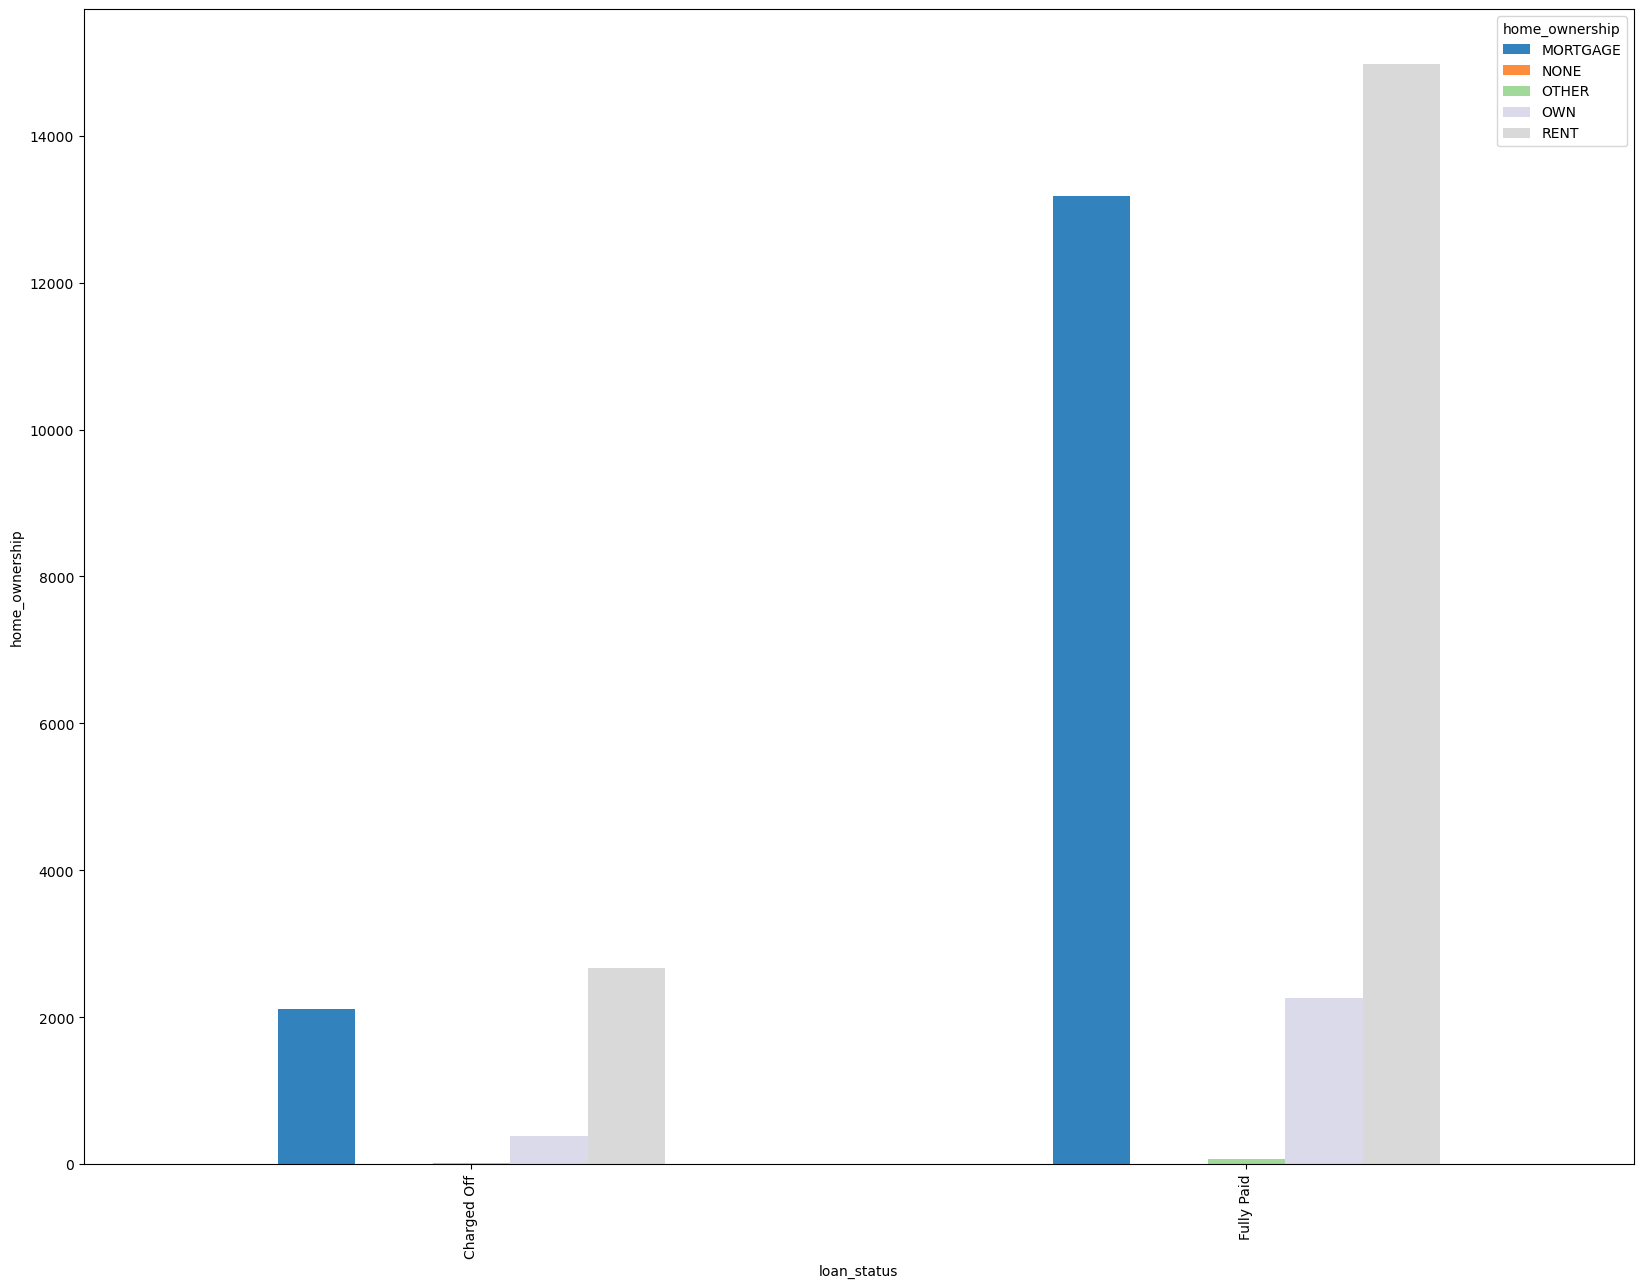

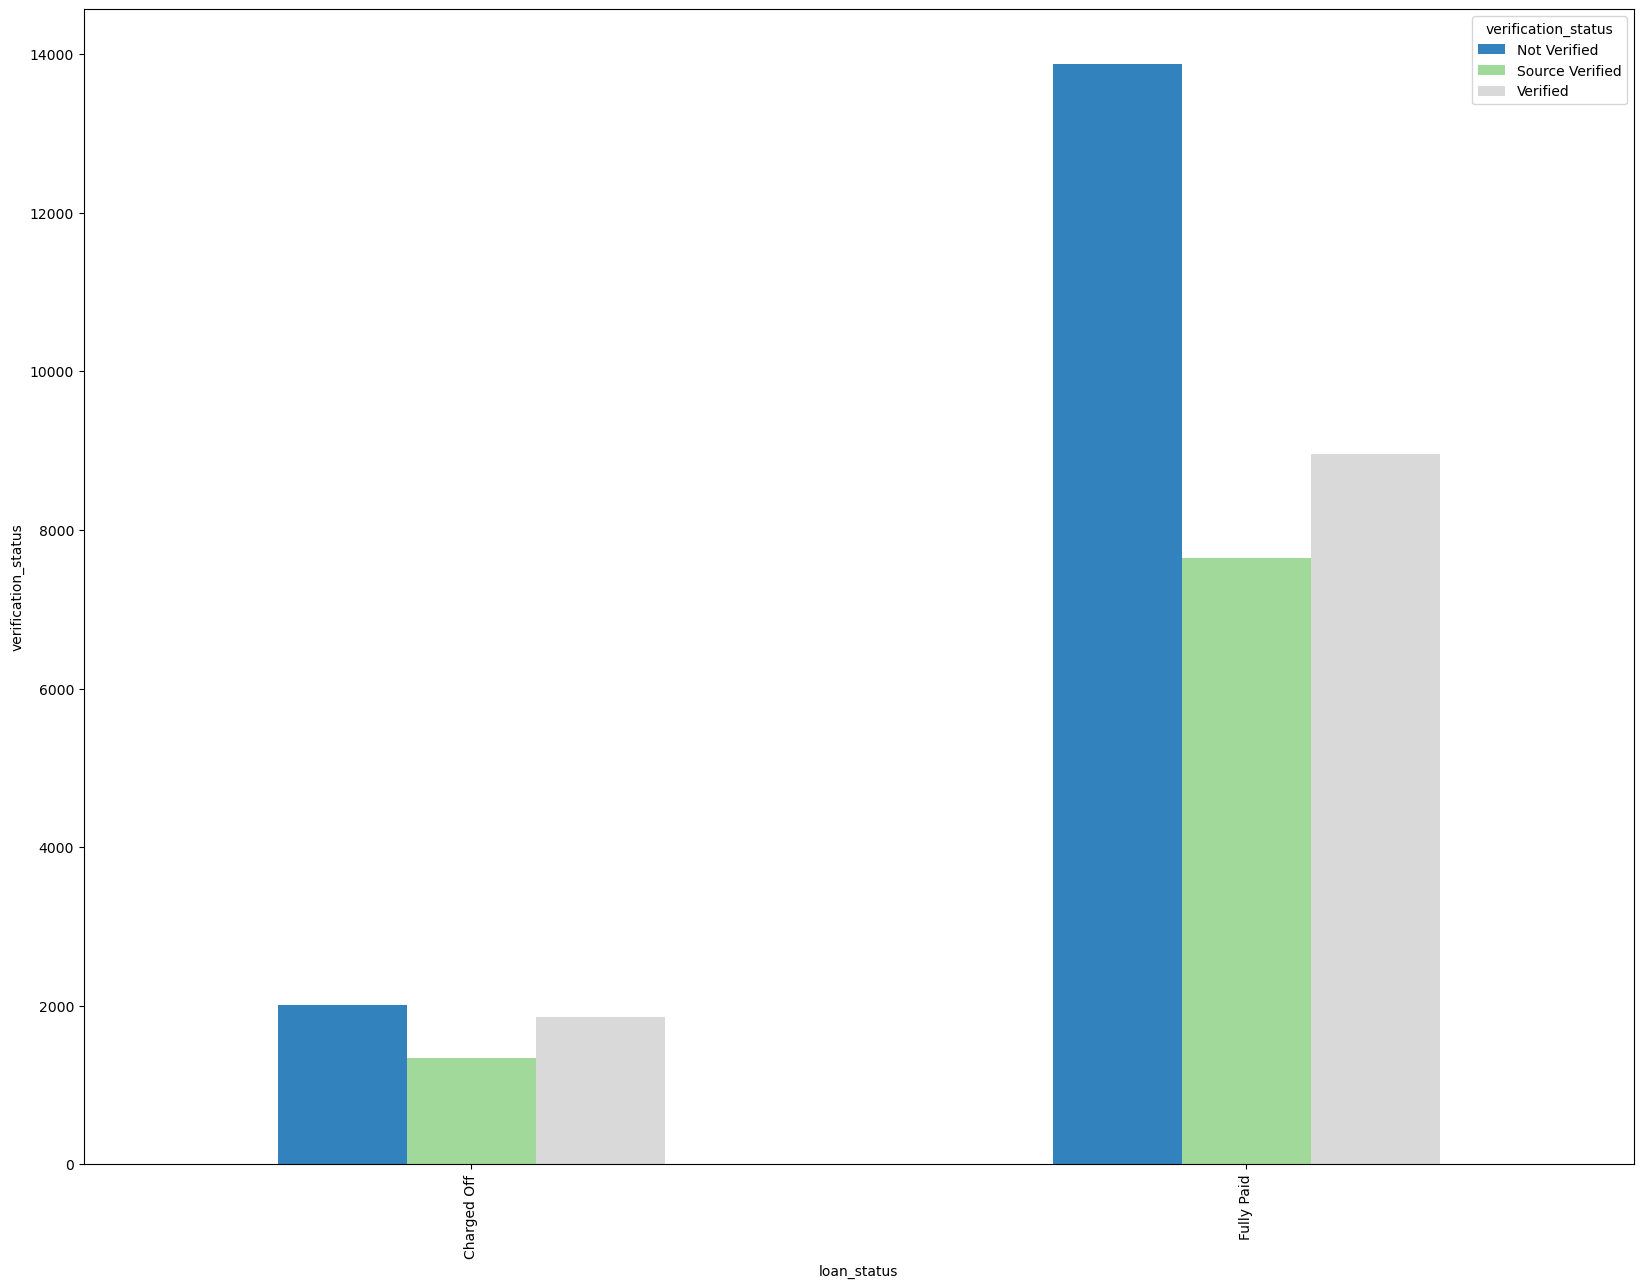

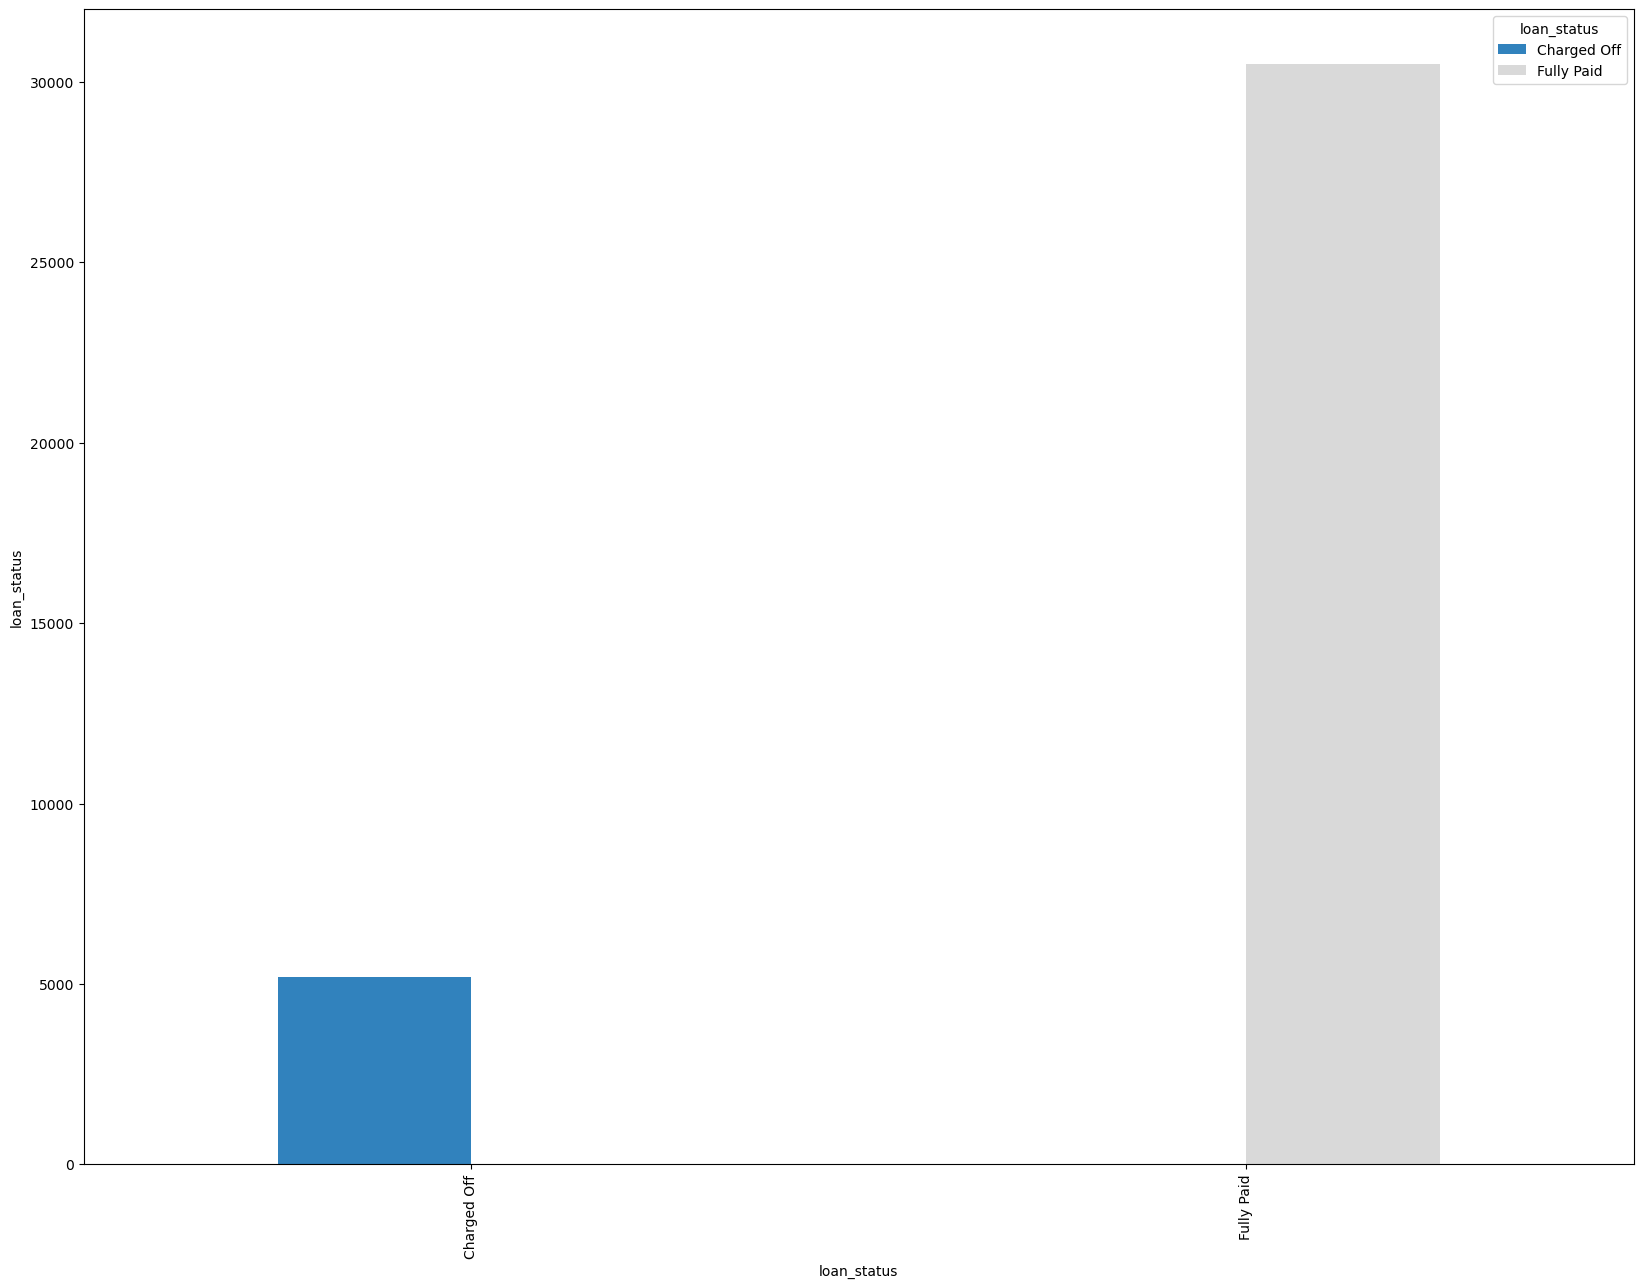

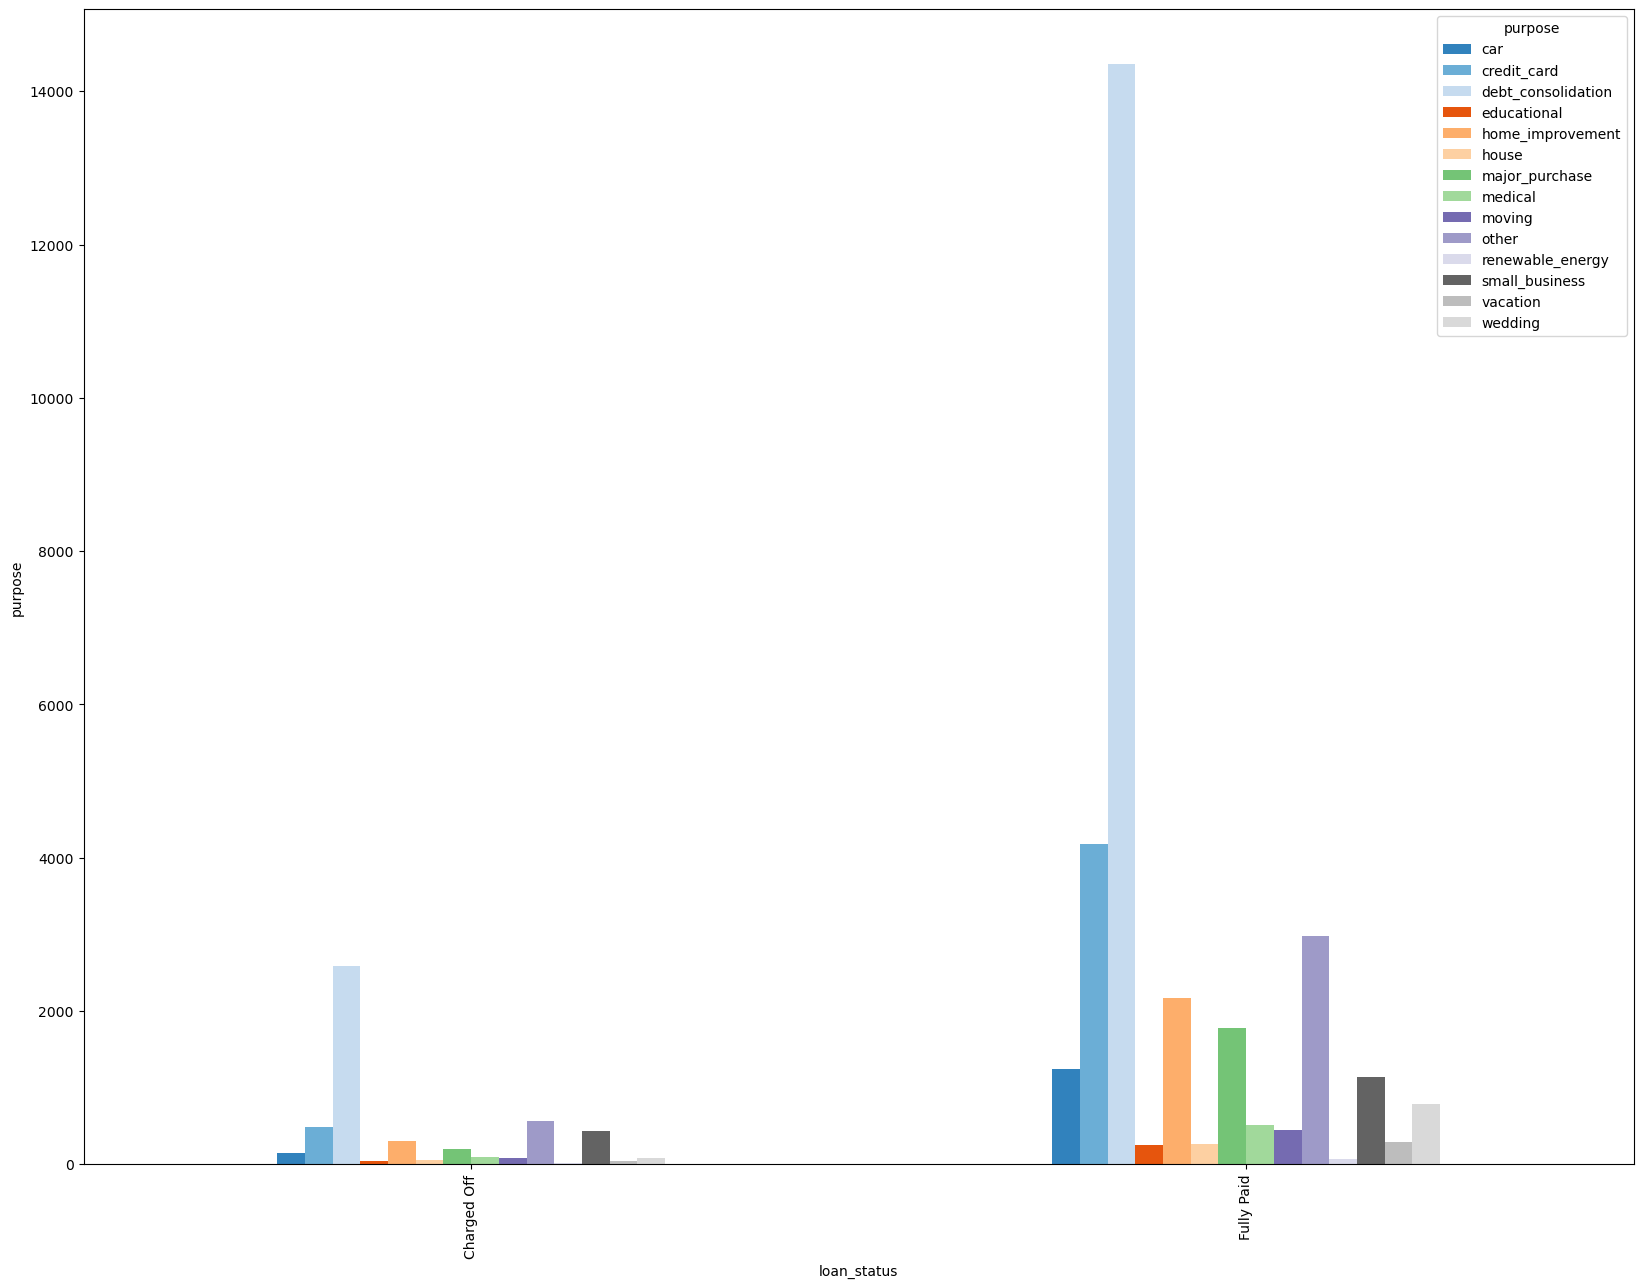

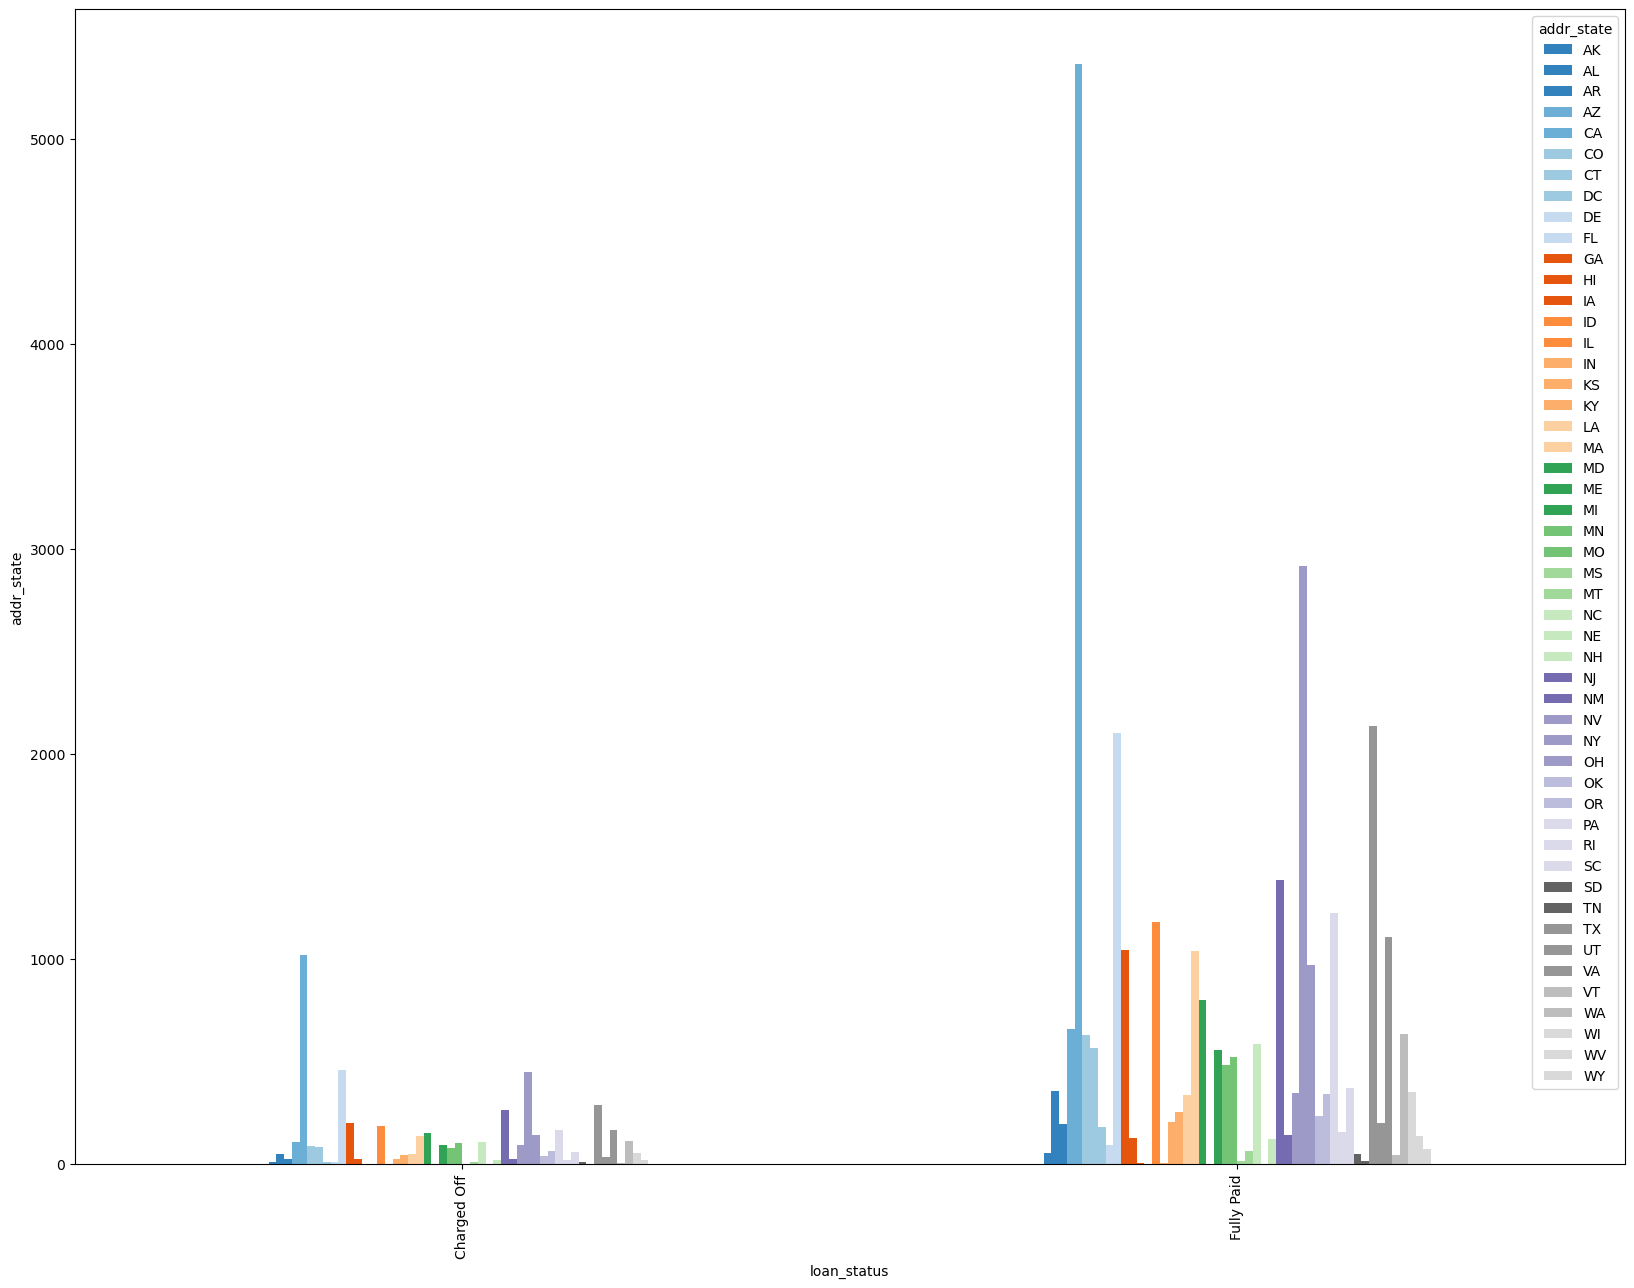

In [83]:
for col in categorical_data:
     ct = pd.crosstab(df['loan_status'], categorical_data[col])
     ct.plot(kind='bar', stacked=False, colormap='tab20c', figsize=(20, 15))
     plt.ylabel(col)


<h3 style="color: orange;">Obsevations : Bivariate Analysis in Categoric Columns</h3>

- Borrowers with a 36-month term have a high representation in both the Charged Off and Fully Paid categories.
- **Grade A:** Loans in Grade A show a high number of Fully Paid loans and a low number of Charged Off loans. In contrast, Grades C, D, and E have higher numbers of Charged Off loans, while Grade A has more Fully Paid loans.
- **Subgrades:** The trend observed in Grades is also reflected in the Subgrades.
- emp_length
- **Home Ownership:** The 'RENT' and 'MORTGAGE' categories have high numbers in both loan statuses, with these two categories also showing the highest default rates.
- **Income Verification:** Loans with unverified income sources have the highest number of defaulters.
- **Debt Consolidation:** This loan purpose has the highest number of defaulters.
- **State Analysis:** California (CA) has the highest number of both Charged Off and Fully Paid borrowers. Additionally, a significant number of defaulters are observed in Nevada (NV).
aulters.ighest loan

<h3 style = \"color : Indigo\"> <span style="color: Green;">Bivariate Analysis in Numeric Columns</span> </h3>

In [86]:
numeric_data.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,issue_month,issue_year
loan_amnt,1.000000,0.981393,0.939012,0.307613,0.929744,0.268447,0.065482,0.009495,0.173790,0.317032,0.065089,0.255794,0.067642,0.128608
funded_amnt,0.981393,1.000000,0.957579,0.310837,0.955872,0.264129,0.065429,0.009651,0.172224,0.310127,0.069126,0.249824,0.058232,0.139074
funded_amnt_inv,0.939012,0.957579,1.000000,0.305088,0.903743,0.251720,0.074094,-0.005492,0.159678,0.290374,0.074569,0.242084,0.085031,0.268288
int_rate,0.307613,0.310837,0.305088,1.000000,0.280382,0.050323,0.112549,0.132270,0.012251,0.098282,0.465580,-0.042191,0.040679,0.061165
installment,0.929744,0.955872,0.903743,0.280382,1.000000,0.267627,0.053055,0.010025,0.169612,0.312429,0.094289,0.230145,0.038541,0.063945
annual_inc,0.268447,0.264129,0.251720,0.050323,0.267627,1.000000,-0.124708,0.034333,0.155740,0.279287,0.015776,0.234601,0.011425,0.014894
dti,0.065482,0.065429,0.074094,0.112549,0.053055,-0.124708,1.000000,-0.000275,0.289219,0.228398,0.278224,0.230755,0.016397,0.096815
inq_last_6mths,0.009495,0.009651,-0.005492,0.132270,0.010025,0.034333,-0.000275,1.000000,0.092114,-0.022756,-0.068705,0.112005,0.012706,-0.060221
open_acc,0.173790,0.172224,0.159678,0.012251,0.169612,0.155740,0.289219,0.092114,1.000000,0.287858,-0.087671,0.685576,0.003387,0.016621
revol_bal,0.317032,0.310127,0.290374,0.098282,0.312429,0.279287,0.228398,-0.022756,0.287858,1.000000,0.303581,0.314152,0.018318,-0.003312


In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(numeric_data.corr(), annot=True)

<Axes: >

With the heatmap we can confirm that loan_amt, funded_amt, funded_amt_inv and installment are having high correlation

<h1 style="color: #663399; font-family: 'Arial', sans-serif; font-weight: bold; font-size: 36px;">Conclusion</h1>

<p style="font-family: 'Arial', sans-serif; font-siz15px0px; font-weight: bold;">
Considering all the above analyses, multiple factors can be taken into account while accepting or rejecting a loan application:
</p>

<ol style="font-family: 'Arial', sans-serif; font15pxe: 20px;">
    <li><strong>Term</strong>: The duration of the loan. (The shorter the duration, the lower the chances of defaulters.)</li>
    <li><strong>Interest Rate</strong>: (The lower the interest rate, the higher the chances of loan repayment.)</li>
    <li><strong>Purpose</strong>: The purpose for which the loan is availed. Categories such as debt consolidation, credit card, home improvement, and small business are major areas where losses are more.
    <li><strong>DTI</strong>: A higher Debt-to-Income (DTI) ratio is associated with a greater likelihood of default./li>
    <li><strong>Address State</strong>: Certain states like CA (California) and FL (Florida) have high loan defaulters.</li>
    <li><strong>Years of Employment</strong>: The length of time a borrower has been employed can impact repayment likelihood.</li>
    <li><strong>Annual Income</strong>: (The higher the income, the higher the chances of repayment.)</li>
    <li><strong>Grades</strong>: Loans graded A and B have higher chances of repayment, while grades C, D, E, F, and G have the maximum defaulters.</li>
    <li><strong>Verification Status</strong>: We observe that defaulters are more prevalent in the 'Verified' and 'Source Verified' categories compared to 'Not Verified'. Thus, we can conclude that income verification or source verification does not guarantee loan repayment.</li>
    <li><strong>Loan Amount</strong>: (The higher the loan amount, the higher the chances of loan default.)</li>
</ol>